# Lending Club Case Study - Exploratory Data Analysis

**Group Members:**
1. Akash Apoorv Yadav
2. Anoop O

### Assignment:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.


# Exploratory Data Analysis



## Data Acquisition and Initial Exploration

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
%matplotlib inline

In [ ]:
# Imports to remove
from google.colab import drive

In [ ]:
# Cell to remove
folder_path = '/content/drive/My Drive/LendingClubCaseStudy'
drive.mount('/content/drive', force_remount=True)
%cd $folder_path

Mounted at /content/drive
/content/drive/My Drive/LendingClubCaseStudy


### Loading Data

In [ ]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

### Preliminary Analysis

In [ ]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
loan_df.shape

(39717, 111)

In [ ]:
loan_df.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
...,...
tax_liens,float64
tot_hi_cred_lim,float64
total_bal_ex_mort,float64
total_bc_limit,float64


In [ ]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning


Let's get the percentage of missing values and plot it on a Histogram

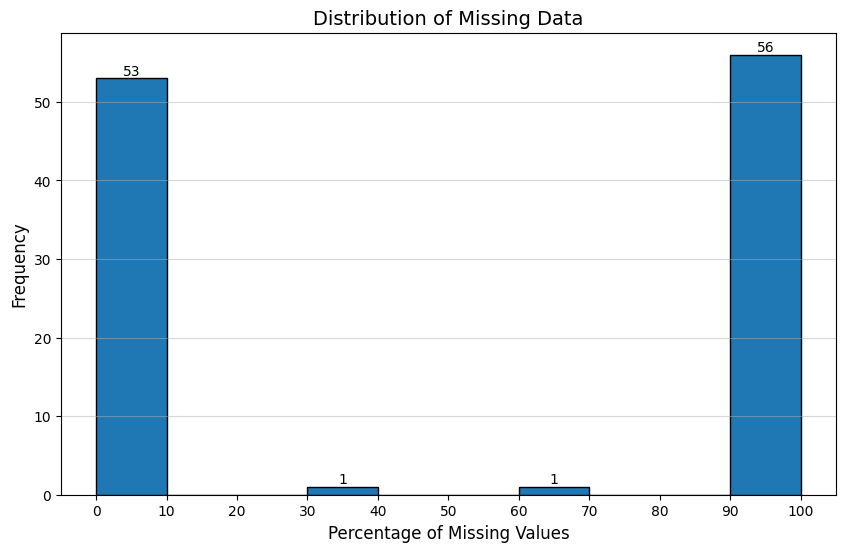

In [ ]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)

plt.figure(figsize=(10, 6))
counts, edges, bars = plt.hist(col_data_missing_percentage, bins=10, edgecolor='black')
plt.bar_label(bars, labels=[int(count) if count > 0 else '' for count in counts])

plt.xlabel("Percentage of Missing Values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Missing Data", fontsize=14)

plt.xticks(range(0, 101, 10))

plt.grid(axis='y', alpha=0.5)
plt.show()

From the histogram we have the following findings.

1.   56 columns have more than 90% missing values, we will simply drop these columns
2.   2 columns has missing values between 30%-70%, we will review these in next steps
3. 53 columns have less that 10% missing values, these are the prime candidates for data cleaning.



Listing the columns with more than 90% missing values to color-code the Data Dictionary

In [ ]:
cols_to_remove = col_data_missing_percentage[
    (col_data_missing_percentage >= 90)
].index.tolist()
print(cols_to_remove)
len(cols_to_remove)

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

56

Listing the columns with missing values between 30% and 70%

In [ ]:
col_data_missing_percentage[(col_data_missing_percentage >= 30) & (col_data_missing_percentage <= 70)]

,0
desc,32.585543
mths_since_last_delinq,64.662487


Analysing **mths_since_last_delinq**

In [ ]:
print(loan_df.mths_since_last_delinq.dtype)
loan_df.mths_since_last_delinq.value_counts()

float64


,count
mths_since_last_delinq,
0.0,443
15.0,252
23.0,247
30.0,247
24.0,241
...,...
120.0,1
115.0,1
85.0,1


**Decision:** **Drop mths_since_last_delinq**
**Reasons:**  

*   Even though it seems a promising variable, bias could be introduced as borrowers who are never delinquent will never show up on this list also
*   64.66% missing values in the column

Analysing **desc**

In [ ]:
loan_df.desc.value_counts()

,count
desc,
,210
Debt Consolidation,8
Camping Membership,6
credit card consolidation,3
credit card debt consolidation,3
...,...
"Borrower added on 05/13/11 > Debt Consolidation<br/> Borrower added on 05/13/11 > I plan to use this money to consolidate bills with high monthly payments and improve cash flow.<br/> Borrower added on 05/13/11 > I have good credit and I have a very stable, solid and professional job that I have held for a long time - over 20 years. I have a Bachelor's degree and I'm currently working on a masters.<br/> Borrower added on 05/13/11 > My mortgage and utilities run approx less than 2k per month including taxes. I have sufficient income to pay off this loan. I simply want to take my open accounts and consolidate them into one easy payment.<br/>",1
Borrower added on 05/16/11 > I plan on utilizing these funds to further boost my already great standing credit.<br/><br/>I am a good borrower as I have zero delinquencies and have had multiple loans all of which have been paid off in a timely manner.<br/><br/>My monthly budget is coordinated so that I have sufficient spending after all bills are paid. In addition I leverage extra funding for savings should any unexpected situations occur.<br/><br/>My job is stable. I have advanced over the past 3 years in the Accounting industry from a Junior Associate to a Regular Associate to a now Senior Associate on my way to becoming a Manager. I have received multiple promotions and see this position as a long term career further motivating me to work and at the same time allowing me job security.<br/>,1
Borrower added on 05/16/11 > We are buying new equiment for a fishing commercial boat. We need the new equiment to be able to fish depper into the sea and get a bigger amount of fish and improve our fishing business.<br/>,1


**Decision**: **Drop desc**
**Reasons**:  

*   Missing values of 33%
*   purpose column provides concise information of the desc col

Considering the previous analysis we can safetly remove all columns with missing values more than 10%

In [ ]:
# Drop columns with more than 90% missing values
threshold = 0.9
loan_df = loan_df.dropna(thresh=len(loan_df) * threshold, axis=1)

# Display summary statistics after dropping columns
print(round(loan_df.isna().sum() * 100 / len(loan_df), 2).sort_values(ascending=False))
loan_df.shape

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
funded_amnt_inv               0.00
sub_grade                     0.00
int_rate                      0.00
home_ownership                0.00
funded_amnt                   0.00
loan_amnt                     0.00
term                          0.00
grade                         0.00
installment                   0.00
member_id                     0.00
id                            0.00
purpose                       0.00
url                           0.00
pymnt_plan                    0.00
loan_status                   0.00
verification_status           0.00
issue_d                       0.00
annual_inc                    0.00
zip_code            

(39717, 53)

### **Feature Selection**


Let's look for constant features

In [ ]:
constant = loan_df.loc[:, loan_df.nunique() == 1]
constant.head()

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [ ]:
drop_columns = constant.columns.tolist()
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

Now let's look at features where there are no unique values (id, member_id, url)

In [ ]:
none_unique = loan_df.loc[:, loan_df.nunique() == len(loan_df)]
none_unique.head()

,id,member_id,url
0,1077501,1296599,https://lendingclub.com/browse/loanDetail.acti...
1,1077430,1314167,https://lendingclub.com/browse/loanDetail.acti...
2,1077175,1313524,https://lendingclub.com/browse/loanDetail.acti...
3,1076863,1277178,https://lendingclub.com/browse/loanDetail.acti...
4,1075358,1311748,https://lendingclub.com/browse/loanDetail.acti...


Decision: Drop columns id, member_id and url as they don't have any impact on loan default analysis

In [ ]:
drop_columns.extend(['id', 'member_id', 'url'])

Analysing zipcode

In [ ]:
loan_df.zip_code.value_counts()

,count
zip_code,
100xx,597
945xx,545
112xx,516
606xx,503
070xx,473
...,...
252xx,1
169xx,1
833xx,1


**Decision**: Drop zip_code column<br>
**Reasons**:

*   Suffixed with XX does not give real zip code information
*   redundant column as addr_state column provides similar value



In [ ]:
drop_columns.append('zip_code')

Dropping the columns
Columns to be dropped:
1. **id**: a random identifier, does not contribute to analysis
2. **member_id**: a random identifier, does not contribute to analysis
3. pymnt_plan: Constant Feature with value 'n' for whole column, can be removed
4. url: does not contribute to loan default analysis
5. zip_code: redundant with addr_state, does not contribute to analysis
6. initial_list_status: Constant Feature with value 'f' for whole column, can be removed
7. policy_code: Constant Feature with value '1' for whole column, can be removed
8. application_type: Constant Feature with value 'INDIVIDUAL' for whole column, can be removed
9. acc_now_delinq: Constant Feature with value '0' for whole column, can be removed
10. delinq_amnt: Constant Feature with value '0' for whole column, can be removed

In [ ]:
loan_df.drop(columns=drop_columns, inplace=True)
loan_df.shape

(39717, 40)

We are now left with 40 columns for further analysis.

In [ ]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Handling Missing Values

In [ ]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)
remaining_cols_with_missing_values = col_data_missing_percentage[col_data_missing_percentage != 0].sort_values(ascending=False).index.tolist()
loan_df[remaining_cols_with_missing_values].nunique()

,0
emp_title,28820
emp_length,11
pub_rec_bankruptcies,3
last_pymnt_d,101
revol_util,1089
title,19615
last_credit_pull_d,106


**emp_title**: The job title supplied by the Borrower when applying for the loan.

As it contains borrower's job titles, let us remove the rows which are not available

It is not a categorical column

In [ ]:
loan_df.dropna(subset=['emp_title'], inplace=True)

In [ ]:
loan_df.emp_title.value_counts()

,count
emp_title,
US Army,134
Bank of America,109
IBM,66
AT&T,59
Kaiser Permanente,56
...,...
Hydra Force Inc.,1
World Security Bureau,1
tri state curb inc,1


In [ ]:
loan_df.emp_title.isna().sum()

0

**emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. The data however is in object format with data like 10+ years, we will convert it to int

It is clearly a categorical column. Let us remove the rows with missing data for this column.

In [ ]:
loan_df.emp_length.isna().sum()

56

In [ ]:
loan_df.dropna(subset=['emp_length'], inplace=True)

In [ ]:
emp_length_list = loan_df.emp_length.value_counts().index.tolist()
print(emp_length_list)
emp_length_list.append(emp_length_list.pop(0))
emp_length_list.insert(1, emp_length_list.pop(5))
emp_length_dict = {}
for item in range(0, 11, 1):
  emp_length_dict[emp_length_list[item]] = item
emp_length_dict

['10+ years', '2 years', '< 1 year', '3 years', '4 years', '5 years', '1 year', '6 years', '7 years', '8 years', '9 years']


{'2 years': 0,
 '1 year': 1,
 '< 1 year': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '10+ years': 10}

In [ ]:
loan_df.emp_length = loan_df.emp_length.map(emp_length_dict)

In [ ]:
loan_df.emp_length.value_counts()

,count
emp_length,
10,8535
0,4273
2,4201
3,3982
4,3357
5,3177
1,3134
6,2158
7,1722


**pub_rec_bankruptcies**: Number of public record bankruptcies

This column is a categorical variable and has 654 missing values. But we cannot impute any values to it therefore we will drop the rows.

We will also convert the type of this feature for float64 to int

In [ ]:
loan_df.pub_rec_bankruptcies.value_counts()

,count
pub_rec_bankruptcies,
0.0,35039
1.0,1502
2.0,7


In [ ]:
loan_df.pub_rec_bankruptcies.isna().sum()

654

In [ ]:
loan_df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [ ]:
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.astype('int32')

In [ ]:
loan_df.pub_rec_bankruptcies.dtype

dtype('int32')

In [ ]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)
col_data_missing_percentage[col_data_missing_percentage>0].sort_values(ascending=False)

,0
last_pymnt_d,0.175112
revol_util,0.125862
title,0.024625


As the percentage of remaining missing data is very low compared to the entire dataset, we can eliminate these rows instead of imputing any values.

In [ ]:
loan_df.dropna(subset=['last_pymnt_d', 'revol_util', 'title'], inplace=True)

In [ ]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)
col_data_missing_percentage[col_data_missing_percentage>0].sort_values(ascending=False)

,0


In [ ]:
loan_df.drop_duplicates(inplace=True)

Now we don't have any missing data across the dataset, let us observe the new shape of loan_df

In [ ]:
loan_df.shape

(36433, 40)

### Fixing Incorrect Datatypes

int_rate column is of type object but should be of type float, removing % symbol and converting to float

In [ ]:
loan_df.int_rate = loan_df.int_rate.str.replace('%', '').astype(float)

revol_util column is of type object but should be of type float, removing % symbol and converting to float

In [ ]:
loan_df.revol_util = loan_df.revol_util.str.replace('%', '').astype(float)

term column is of type object but should be of type int, removing ' months' and converting to int

In [ ]:
loan_df.term = loan_df.term.str.replace(' months', '').astype(int)

### Identifying and formatting date columns

In [ ]:
loan_df[["issue_d","earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]].value_counts()

issue_d  earliest_cr_line  last_pymnt_d  last_credit_pull_d
May-11   Feb-00            May-16        May-16                4
Sep-11   Nov-01            Sep-14        Sep-14                4
Nov-11   Dec-93            Dec-14        May-16                4
May-10   Feb-98            May-13        May-16                4
Jan-11   Dec-98            Jan-14        Jan-14                4
                                                              ..
Jan-10   Dec-93            Aug-10        Aug-10                1
         Dec-94            Aug-10        May-16                1
                           Aug-11        May-16                1
                           Feb-13        Feb-13                1
         Dec-90            Dec-10        Dec-10                1
Name: count, Length: 35270, dtype: int64

In [ ]:
datetime_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
loan_df[datetime_columns] = loan_df[datetime_columns].apply(pd.to_datetime, format='%b-%y')

In [ ]:
loan_df[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


**issue_d**: The month in which the loan was funded. Let's split it into issue_d_year and issue_d_month

In [ ]:
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month

**earliest_cr_line:** The month the borrower's earliest reported credit line was opened. Splitting the column into two earliest_cr_line_year and earliest_cr_line_month

In [ ]:
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year
loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month

last_pymnt_d: Last month payment was received, splitting this col into last_pymnt_d_month and last_pymnt_d_year

In [ ]:
loan_df['last_pymnt_d_month'] = loan_df['last_pymnt_d'].dt.month
loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d'].dt.year

**last_credit_pull_d**: The most recent month LC pulled credit for this loan, splitting this col into last_credit_pull_d_year, last_credit_pull_d_month

In [ ]:
loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].dt.year
loan_df['last_credit_pull_d_month'] = loan_df['last_credit_pull_d'].dt.month

In [ ]:
loan_df.drop(columns=datetime_columns, inplace=True)

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 36433 non-null  int64  
 1   funded_amnt               36433 non-null  int64  
 2   funded_amnt_inv           36433 non-null  float64
 3   term                      36433 non-null  int64  
 4   int_rate                  36433 non-null  float64
 5   installment               36433 non-null  float64
 6   grade                     36433 non-null  object 
 7   sub_grade                 36433 non-null  object 
 8   emp_title                 36433 non-null  object 
 9   emp_length                36433 non-null  int64  
 10  home_ownership            36433 non-null  object 
 11  annual_inc                36433 non-null  float64
 12  verification_status       36433 non-null  object 
 13  loan_status               36433 non-null  object 
 14  purpose    

### Standardization of precision columns

In [ ]:
loan_df = loan_df.round(decimals=2)

In [ ]:
loan_df.select_dtypes(include=['float64']).head()

,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
1,2500.0,15.27,59.83,30000.0,1.00,9.4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
3,10000.0,13.49,339.31,49200.0,20.00,21.0,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000.0,12.69,67.79,80000.0,17.94,53.9,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79
5,5000.0,7.90,156.46,36000.0,11.20,28.3,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03
6,7000.0,15.96,170.08,47004.0,23.51,85.6,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76


In [ ]:
loan_df.verification_status.value_counts()

,count
verification_status,
Not Verified,15056
Verified,11926
Source Verified,9451


### Data filtering

We don't need to keep the 'Current' loans under consideration as they are considered as not-defaulted. Removing them from our analysis.

In [ ]:
loan_df.loan_status.value_counts()

,count
loan_status,
Fully Paid,30424
Charged Off,4943
Current,1066


In [ ]:
loan_df = loan_df[loan_df.loan_status != 'Current']

#### Removing Constant Features

Let us check if any new constant features have developed

In [ ]:
loan_df.loc[:, loan_df.nunique() == 1]

,out_prncp,out_prncp_inv
1,0.0,0.0
3,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
...,...,...
39551,0.0,0.0
39562,0.0,0.0
39623,0.0,0.0
39666,0.0,0.0


In [ ]:
loan_df[['loan_status', 'out_prncp', 'out_prncp_inv']].value_counts()

,,,count
loan_status,out_prncp,out_prncp_inv,
Fully Paid,0.0,0.0,30424
Charged Off,0.0,0.0,4943


**Observations:**
* As all data of out_prncp and out_prncp_inv columns was for Current loan, these columns hold 0 significance for our analysis. Dropping them.

In [ ]:
loan_df.drop(columns=['out_prncp', 'out_prncp_inv'], inplace=True)

In [ ]:
loan_df.shape

(35367, 42)

***We now have 42 colums and 35367 rows.***

### Outlier Detection and Handling

## Analysis

### Univariate and Segmented Univariate Analysis

#### Visualisation Setup

Importing Roboto font

In [ ]:
import matplotlib.font_manager as fm

font_path = 'assets/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
# print(fontprop.get_name())
# print(fontprop)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['font.sans-serif'] = [fontprop.get_name()]

Function for analysing categorical columns

In [ ]:
enableYGrids=True
enableXGrids=False
snsDespine=True

In [ ]:
def manage_grid_lines(ax):
  if not enableXGrids and not enableYGrids:
    ax.grid(False)
  else:
    if enableXGrids:
        ax.grid(axis='x', linestyle='--', alpha=0.5)
    if enableYGrids:
        ax.grid(axis='y', linestyle='--', alpha=0.5)


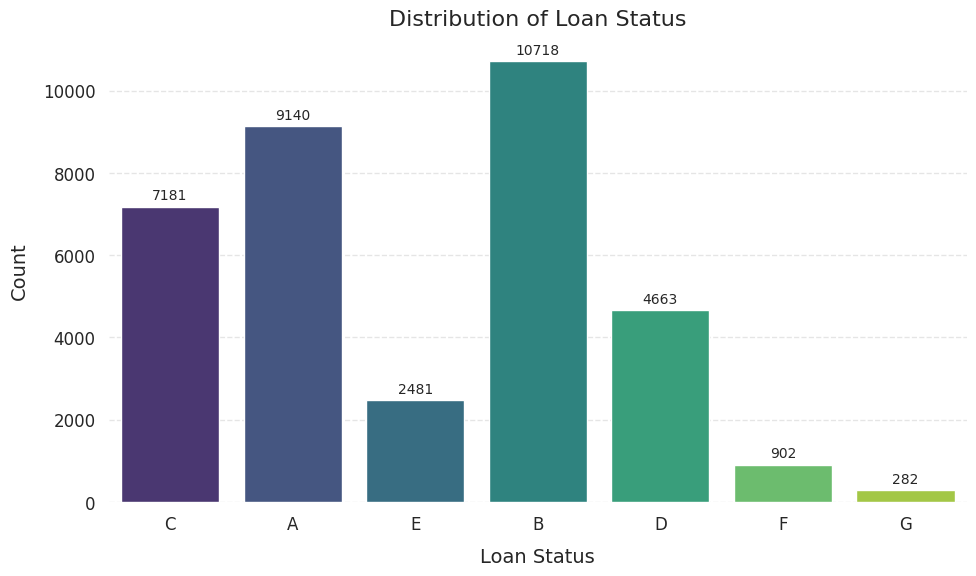

In [ ]:
def plot_categorical_distribution(dataframe, column_name, title, colors='viridis', rotations=0, sort_index=False, legend=False):
    """
    Plots the distribution of a categorical column using Seaborn.

    Args:
      dataframe (pd.DataFrame): The input DataFrame.
      column_name (str): The name of the categorical column to plot
      title (str): The label of the categorical column to plot
      colors (list | str): The color palette to use for the plot
      rotations (int): The number of degrees to rotate the x-axis labels
      sort_index (bool): Whether to sort the x-axis labels by index
      legend (bool): Whether to add a legend to the plot
    """

    sns.set_theme(style="whitegrid", font_scale=1.2)

    # Dynamically calculate figure width based on unique categories
    n_categories = dataframe[column_name].nunique()
    fig_width = max(10, n_categories * 0.5)

    plt.figure(figsize=(fig_width, 6))
    # text_col_name = column_name.replace('_', ' ').title()
    palette = sns.color_palette(colors, n_colors=n_categories)
    order = sorted(dataframe[column_name].unique()) if sort_index else None

    # Create count plot
    ax = sns.countplot(
        x=column_name,
        data=dataframe,
        palette=palette,
        order=order,
        hue=column_name,
        hue_order=order,
        legend=legend
    )
    if snsDespine:
      sns.despine(left=True, bottom=True)
    manage_grid_lines(ax)

    title_font_size = 16
    plt.xlabel(title, fontsize=title_font_size - 2, labelpad=10)
    plt.ylabel('Count', fontsize=title_font_size - 2, labelpad=10)
    plt.title(f'Distribution of {title}', fontsize=title_font_size, pad=10)

    # Add labels with counts
    for container in ax.containers:
        ax.bar_label(container, fontsize=title_font_size - 6, padding=3)

    plt.xticks(rotation=rotations, fontsize=title_font_size - 4)
    plt.yticks(fontsize=title_font_size - 4)
    plt.tight_layout()
    plt.show()
# Testing
plot_categorical_distribution(loan_df, 'grade', 'Loan Status')


Function for analysing distribution plots for quantative variables

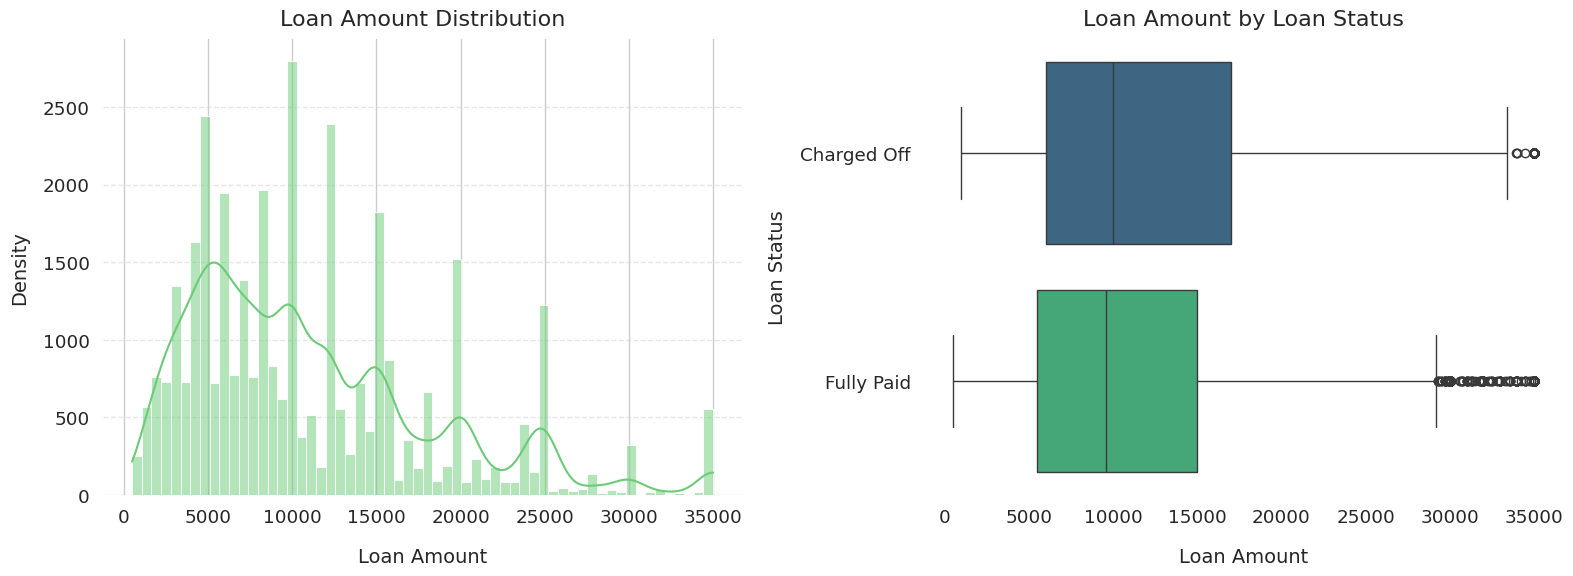

In [ ]:
def plot_distribution(dataframe, column_name, title, color="#6BCB77", kde=True):
    """
    Function to create a distribution plot and a boxplot as subplots.

    Parameters:
    - data: DataFrame containing the data.
    - column: Column to plot the distribution for.
    - title: Title of the distribution plot.
    - xlabel: Label for the x-axis.
    - color: Color of the plots (default: Material Design green).
    - kde: Whether to overlay a Kernel Density Estimate on the distribution plot (default: True).
    """

    sns.set_theme(style="whitegrid", font_scale=1.2)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    sns.histplot(
        data=dataframe,
        x=column_name,
        kde=kde,
        color=color,
        ax=ax[0]
    )
    ax[0].set_title(f'{title} Distribution', fontsize=16, pad=10)
    ax[0].set_xlabel(title, fontsize=14, labelpad=15)
    ax[0].set_ylabel("Density" if kde else "Frequency", fontsize=14, labelpad=10)
    manage_grid_lines(ax[0])
    sns.boxplot(
        x=dataframe[column_name],
        y=dataframe['loan_status'],
        data=dataframe,
        palette='viridis',
        ax=ax[1]
    )
    ax[1].set_title(f"{title} by Loan Status", fontsize=16, pad=10)  # Adjust fontsize
    ax[1].set_xlabel(title, fontsize=14, labelpad=15)  # Adjust fontsize and labelpad
    ax[1].set_ylabel("Loan Status", fontsize=14, labelpad=10)  # Adjust fontsize and labelpad
    ax[1].grid(False)
    if snsDespine:
        sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()
# Test
plot_distribution(loan_df, 'loan_amnt', 'Loan Amount')

Plot the distribution of a categorical variable across the entire dataset and within "Charged Off"

In [ ]:
def plot_percentages_by_category(dataframe, column_name, column_label, plot_axis='y', rotation=0, title_padding=10, sortbyindex=False, colors='viridis'):
    """
    Plot the distribution of a categorical variable across the entire dataset and within "Charged Off" loans.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to analyze.
        column_label (str): The label for the categorical column.
        plot_axis (str): The axis orientation ('x' or 'y'). Default is 'y'.
        rotation (int): Rotation angle for x-axis labels. Default is 0.
        title_padding (int): Padding for the title. Default is 10.
        sortbyindex (bool): Whether to sort the bars by index. Default is False.
        colors (list | str): Color palette for the bars. Default is 'viridis'.
    """
    sns.set_theme(style="whitegrid", font_scale=1.2)
    def plot_subplot(data, ax, title, orientation='y'):
        counts = data.value_counts()
        values = data.value_counts(normalize=True) * 100

        if sortbyindex:
            values = values.sort_index()
            counts = counts.sort_index()

        if orientation == 'y':
            barplot = sns.barplot(
                x=values.values, y=values.index, ax=ax,
                palette=palette)
            ax.set_ylabel(column_label, fontsize=14, labelpad=10)
            ax.set_xlabel('Percent %', fontsize=14, labelpad=15)
        else:
            barplot = sns.barplot(
                x=values.index, y=values.values, ax=ax,
                palette=palette
            )
            ax.set_xlabel(column_label, fontsize=14, labelpad=15)
            ax.set_ylabel('Percent %', fontsize=14, labelpad=10)

        ax.set_title(title, fontsize=16, pad=title_padding)

        # Add bar labels with percentages and counts
        labels = [f'{p:.1f}% ({c})' for p, c in zip(values, counts)]
        for i, label in enumerate(labels):
            ax.bar_label(ax.containers[i], labels=[label], fontsize=10, fmt='%.2f%%', label_type='edge', rotation=rotation, padding=3)
        manage_grid_lines(ax)
        if snsDespine:
          sns.despine(left=True, bottom=True)
        ax.grid(False)

    # Calculate dynamic figure size
    n_categories = dataframe[column_name].nunique()
    palette = sns.color_palette(colors, n_colors=n_categories)
    fig_width = max(12, n_categories * 0.5)

    fig = plt.figure(figsize=(fig_width, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Plot overall distribution
    plot_subplot(dataframe[column_name], ax1, title='Overall Distribution', orientation=plot_axis)

    # Plot distribution for "Charged Off" loans
    charged_off_data = dataframe[dataframe['loan_status'] == 'Charged Off'][column_name]
    plot_subplot(charged_off_data, ax2, title='Charged Off Distribution', orientation=plot_axis)

    plt.tight_layout()
    plt.show()

# plot_percentages_by_category(loan_df, 'loan_status', 'Loan Status', 'x')


Function to calculate and displays the percentage of loans in a specified status (e.g., 'Charged Off') for each category of a given variable

In [ ]:
def plot_percent_against_loan_status(
    dataframe, column_name, column_label, rotation=0, title_padding=10,
    palette='viridis', display_counts=True, loan_status='Charged Off'
):
    """
    Plots the percentage of loans with a specified loan status against another categorical variable using Seaborn.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        column_name (str): The column to group by.
        column_label (str): Label for the x-axis.
        rotation (int): Rotation angle for x-tick labels. Default is 0.
        title_padding (int): Padding for the title. Default is 10.
        palette (str): Seaborn palette for the bar plot. Default is 'viridis'.
        display_counts (bool): Whether to display counts along with percentages in the bar labels.
        loan_status (str): The loan status to analyze. Default is 'Charged Off'.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set_theme(style="whitegrid")

    # Create cross-tabulations
    crosstab_percent = pd.crosstab(dataframe['loan_status'], dataframe[column_name], normalize='columns') * 100
    crosstab_count = pd.crosstab(dataframe['loan_status'], dataframe[column_name])

    # Extract the percentages and counts for the specified `loan_status`
    percentages = crosstab_percent.loc[loan_status]
    counts = crosstab_count.loc[loan_status]

    # Prepare data for Seaborn
    plot_data = pd.DataFrame({
        column_label: percentages.index,
        'Percentage': percentages.values,
        'Counts': counts.values
    })

    # Dynamically calculate figure width
    n_categories = len(percentages)
    fig_width = max(10, n_categories * 0.5)

    plt.figure(figsize=(fig_width, 6))
    palette = sns.color_palette(palette, n_colors=n_categories)

    # Create bar plot
    ax = sns.barplot(
        x=column_label,
        y='Percentage',
        data=plot_data,
        palette=palette
    )

    # Remove spines and grid
    sns.despine(left=True, bottom=True)
    ax.grid(False)

    # Add labels
    ax.set_xlabel(column_label, fontsize=14, labelpad=15)
    ax.set_ylabel(f'% of loans {loan_status}', fontsize=14, labelpad=10)
    plt.title(f'Loan Status by {column_label}', fontsize=16, pad=title_padding)

    # Add bar labels with percentages and counts
    labels = [f'{p:.1f}% ({c})' for p, c in zip(percentages.values, counts.values)]
    for i, container in enumerate(ax.containers):
        ax.bar_label(container, labels=[labels[i]], label_type='edge', padding=3, fontsize=10, rotation=rotation)

    # Adjust tick labels
    plt.xticks(rotation=rotation, fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# plot_percent_against_loan_status(loan_df, 'grade', 'Grade')

Function to perform univariate analysis

In [ ]:
def perform_univariate_analysis(dataframe, column_name):
    heading = f"Univariate Analysis of '{column_name}'";
    print(f"\n{'='*len(heading)}")
    print(f"Univariate Analysis of '{column_name}'")
    print(f"{'='*len(heading)}")

    # Grouped description
    grouped_description = dataframe.groupby('loan_status')[column_name].describe()
    print("\nDescription grouped by loan_status:")
    print(grouped_description)

    # Grouped count
    grouped_count = dataframe.groupby('loan_status')[column_name].count()
    print("\nCount grouped by loan_status:")
    print(grouped_count)

    # Value counts
    value_counts = dataframe[column_name].value_counts()
    print("\nOverall value counts:")
    print(value_counts)


#### Categorical Features

##### loan_status

**Definition** <br>
Current status of the loan

In [ ]:
perform_univariate_analysis(loan_df, 'loan_status')


Univariate Analysis of 'loan_status'

Description grouped by loan_status:
             count unique          top   freq
loan_status                                  
Charged Off   4943      1  Charged Off   4943
Fully Paid   30424      1   Fully Paid  30424

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: loan_status, dtype: int64

Overall value counts:
loan_status
Fully Paid     30424
Charged Off     4943
Name: count, dtype: int64


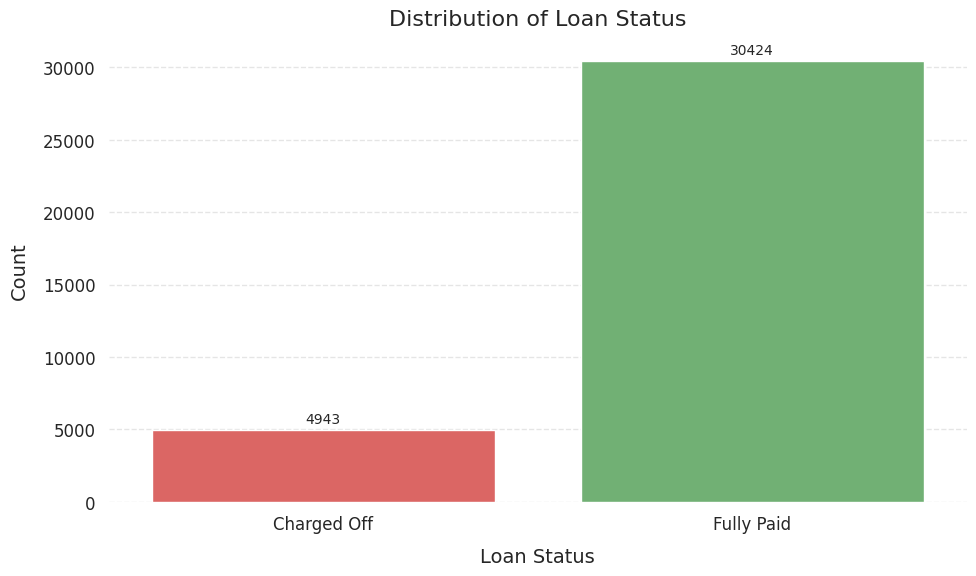

In [ ]:
colors = ['#EF5350', '#66BB6A']
plot_categorical_distribution(loan_df, 'loan_status', 'Loan Status', colors, rotations=0)

In [ ]:
charged_off_loan_percent = round(loan_df[loan_df.loan_status == 'Charged Off'].loan_status.count() / loan_df.loan_status.count() * 100, 2)
print(f'Percentage of Charged Off loans: {charged_off_loan_percent}%')

Percentage of Charged Off loans: 13.98%


In [ ]:
# Find cutoff rate of keyCalculate 20% of 13.98%
key_risk_factor_percent = round(charged_off_loan_percent + charged_off_loan_percent * 0.2, 2)
print(f'{key_risk_factor_percent}%')

16.78%


The dataset reveals a baseline loan default rate of 13.98%. To identify significant risk factors, we will focus on categories where the default rate surpasses 20%.  Specifically,  feature variables that contribute to a 16.78% or higher increase in the proportion of charged-off loans will be examined in detail.

##### **term**

**Definition** <br>
The number of payments on the loan. Values are in months and can be either 36 or 60

In [ ]:
perform_univariate_analysis(loan_df, 'term')


Univariate Analysis of 'term'

Description grouped by loan_status:
               count       mean        std   min   25%   50%   75%   max
loan_status                                                             
Charged Off   4943.0  46.744892  11.935390  36.0  36.0  36.0  60.0  60.0
Fully Paid   30424.0  41.346043   9.986397  36.0  36.0  36.0  36.0  60.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: term, dtype: int64

Overall value counts:
term
36    26377
60     8990
Name: count, dtype: int64


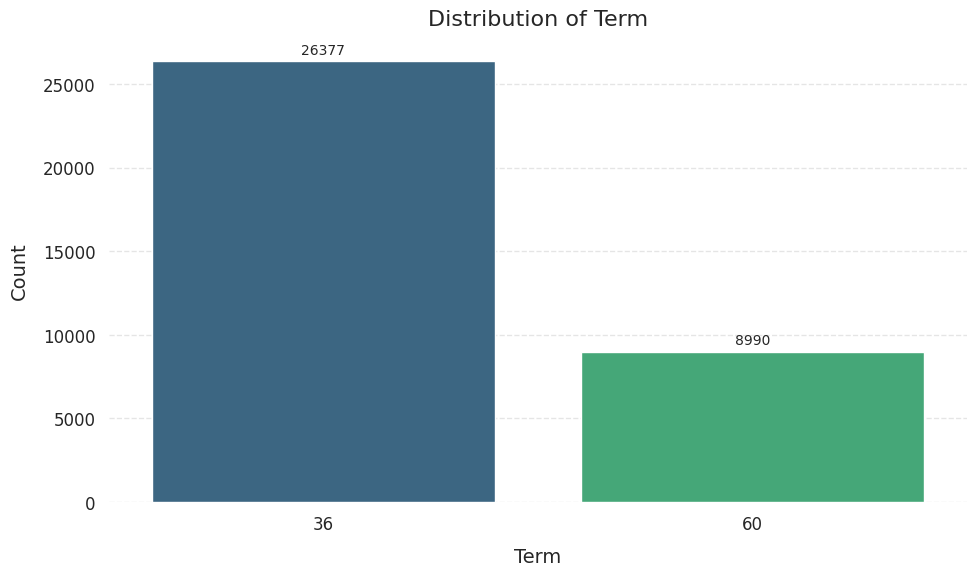

In [ ]:
plot_categorical_distribution(loan_df, 'term', 'Term')

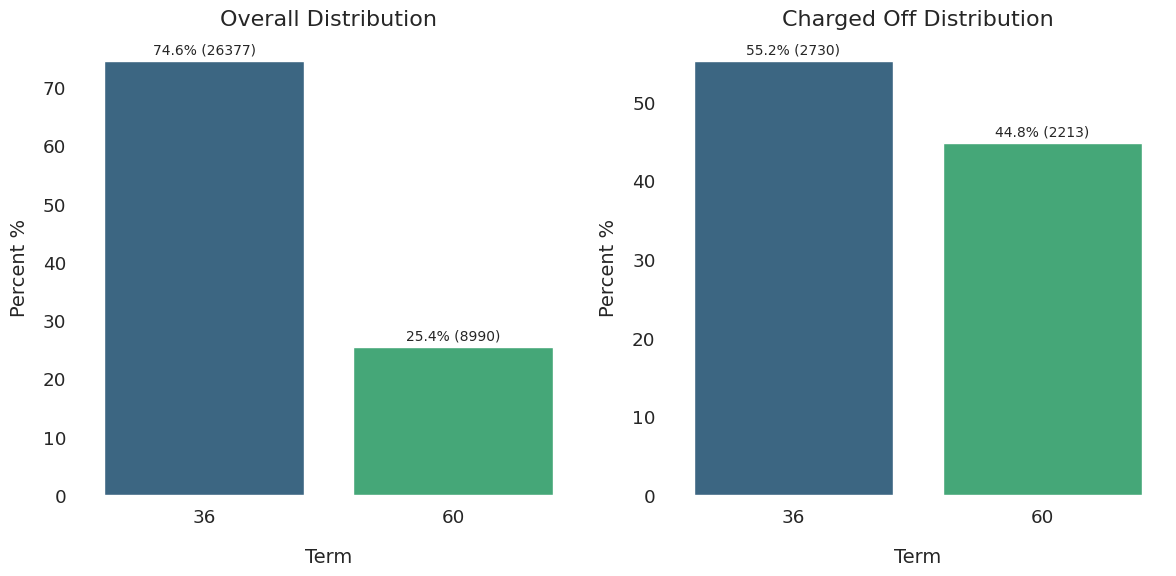

In [ ]:
plot_percentages_by_category(loan_df, 'term', 'Term', 'x', 0, 10)

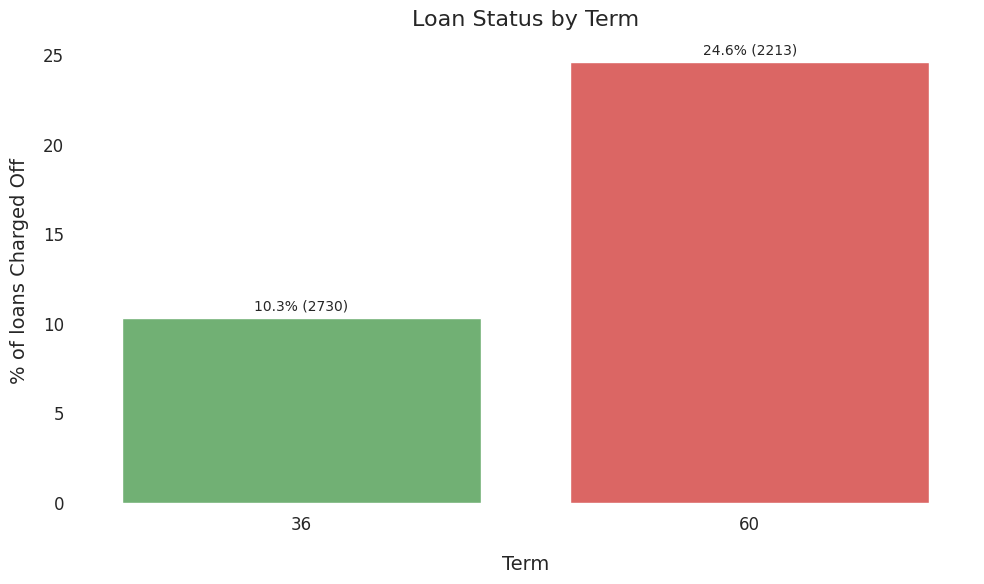

In [ ]:
colors = ['#66BB6A', '#EF5350']
plot_percent_against_loan_status(loan_df, 'term', 'Term', palette=colors)

**Observations:**
* Most loans are issued for a term of 36 months
* 36-month term loans make up around 75% of the total loans
* 60-month term loans have a higher percentage of charged-off loans (around 24.6%) compared to 36-month term loans (around 10%)

##### grade

**Definition** <br>
LC assigned loan grade

In [ ]:
perform_univariate_analysis(loan_df, 'grade')


Univariate Analysis of 'grade'

Description grouped by loan_status:
             count unique top  freq
loan_status                        
Charged Off   4943      7   B  1253
Fully Paid   30424      7   B  9465

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: grade, dtype: int64

Overall value counts:
grade
B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: count, dtype: int64


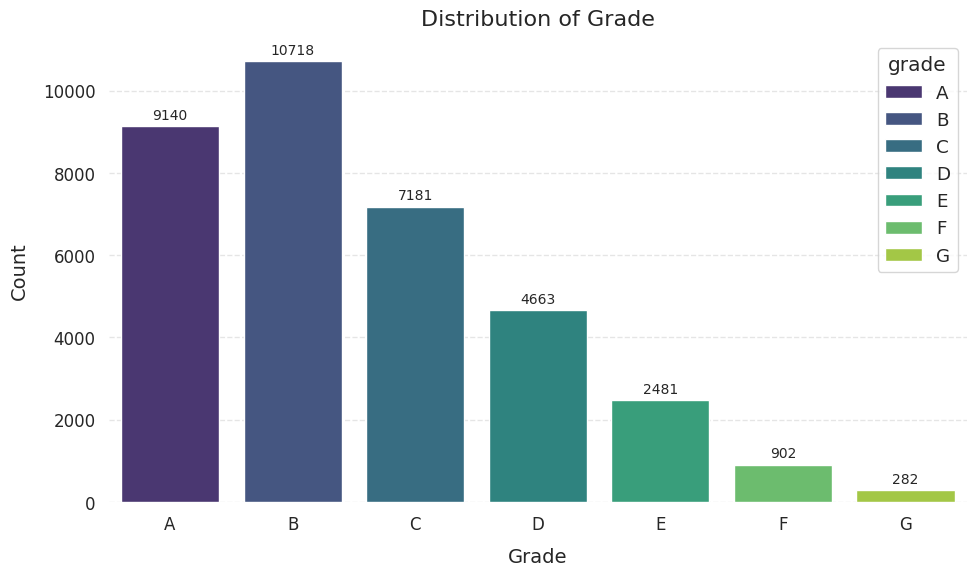

In [ ]:
# import colorcet as cc
plot_categorical_distribution(loan_df, 'grade', 'Grade', rotations=0, sort_index=True, legend=True)

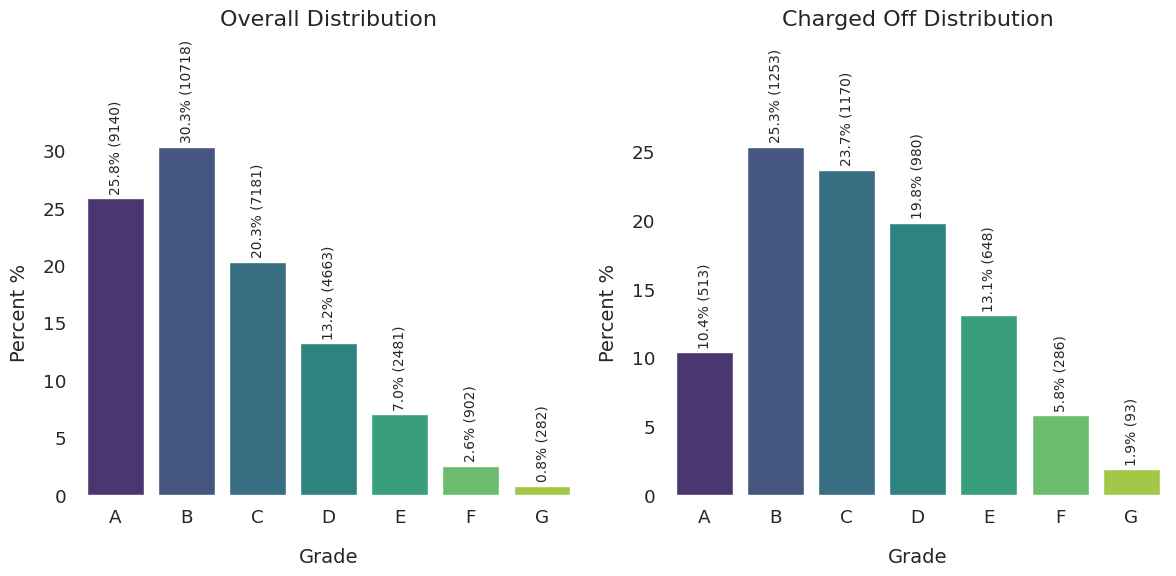

In [ ]:
plot_percentages_by_category(loan_df, 'grade', 'Grade', 'x', 90, 75, True)

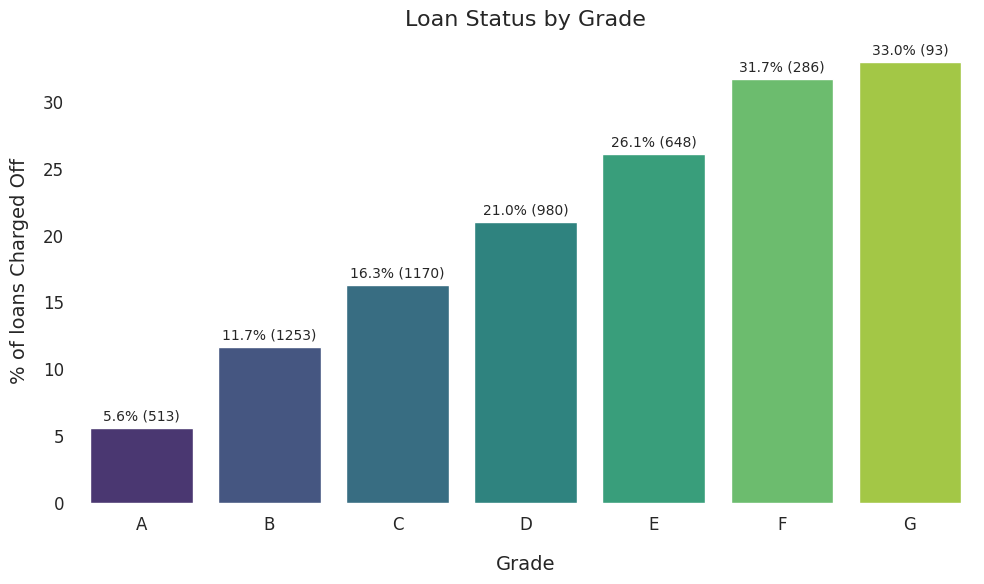

In [ ]:
plot_percent_against_loan_status(loan_df, 'grade', 'Grade')

**Observations:**
* Most loans are assigned grades A, B, and C, with fewer loans in the lower grades (D-G)
* Approximately 80% loans are sanctioned in grades (A-C)
* The charge-off percentage steadily increases as loan grades decline, with Grade G loans showing the highest risk
* Lending Club's Grading system works

##### sub_grade

**Definition** <br>
LC assigned loan sub-grade

In [ ]:
perform_univariate_analysis(loan_df, 'sub_grade')


Univariate Analysis of 'sub_grade'

Description grouped by loan_status:
             count unique top  freq
loan_status                        
Charged Off   4943     35  B5   331
Fully Paid   30424     35  A4  2504

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: sub_grade, dtype: int64

Overall value counts:
sub_grade
A4    2662
B3    2589
A5    2487
B5    2444
B4    2247
C1    1874
B2    1825
C2    1791
A3    1630
B1    1613
C3    1369
A2    1356
D2    1184
C4    1095
C5    1052
D3    1022
A1    1005
D4     848
D1     846
D5     763
E1     691
E2     566
E3     482
E4     394
E5     348
F1     293
F2     214
F3     160
F4     136
F5      99
G1      88
G2      74
G4      54
G3      41
G5      25
Name: count, dtype: int64


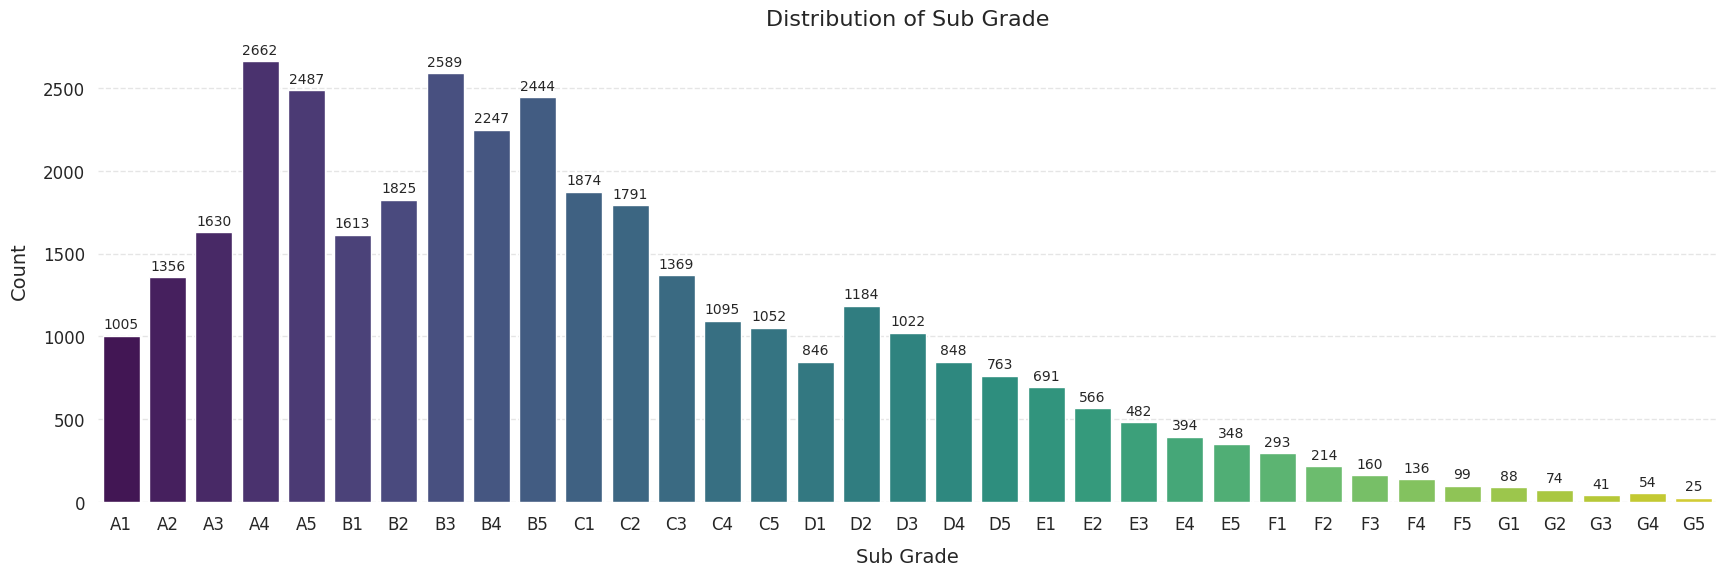

In [ ]:
plot_categorical_distribution(loan_df, 'sub_grade', 'Sub Grade', rotations=0, sort_index=True)

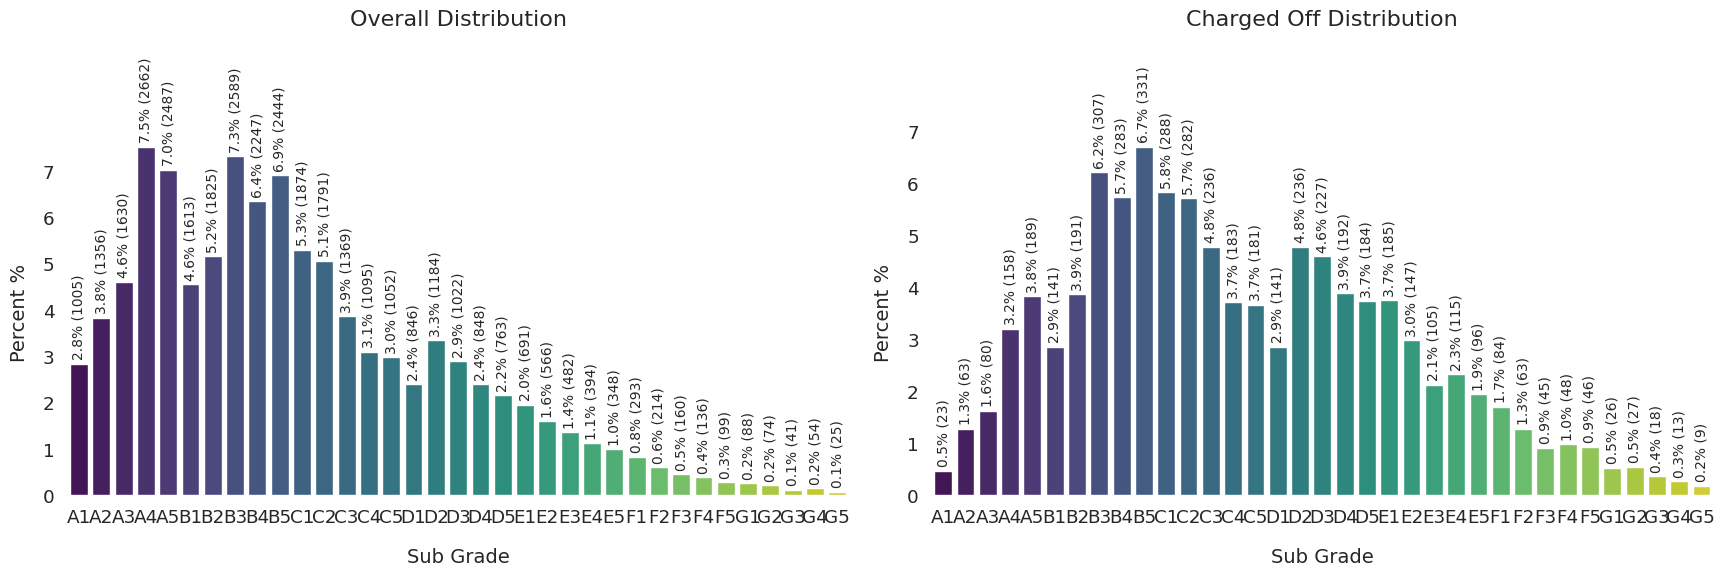

In [ ]:
plot_percentages_by_category(loan_df, 'sub_grade', 'Sub Grade', 'x', 90, 75, True)

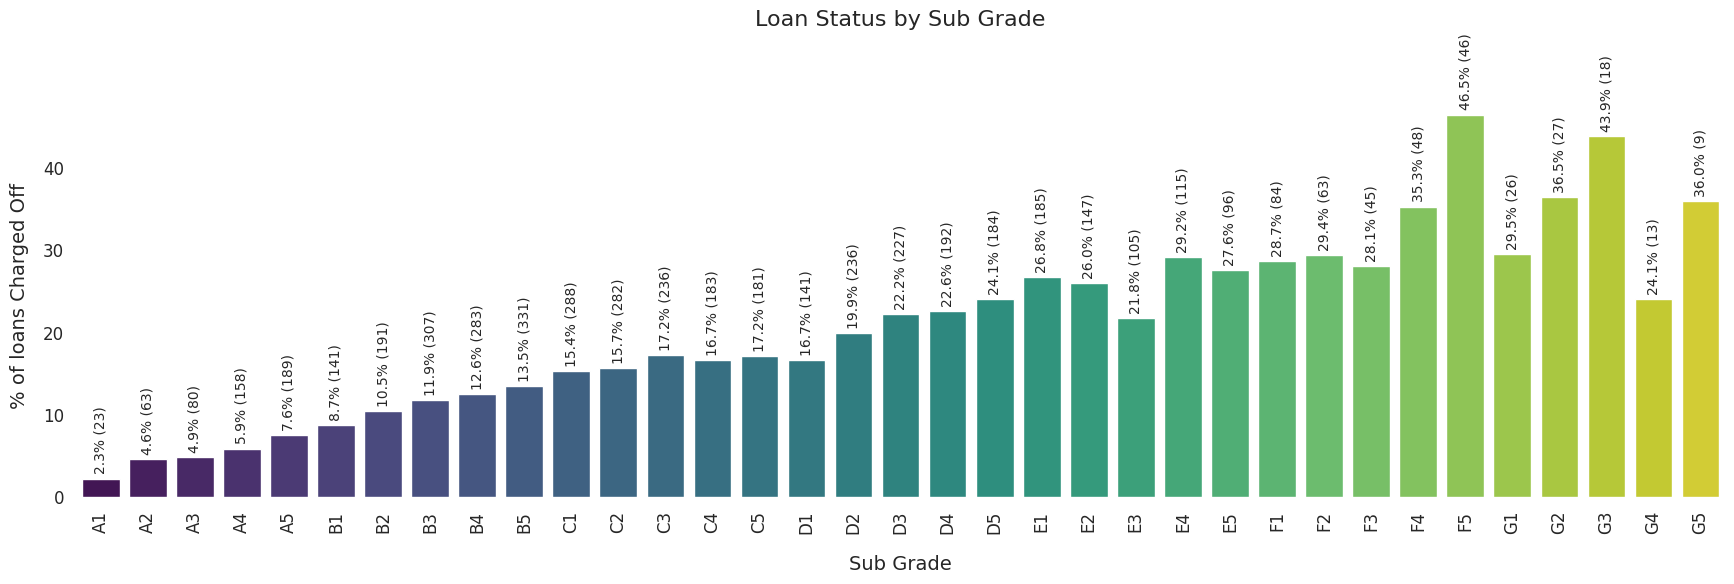

In [ ]:
plot_percent_against_loan_status(loan_df, 'sub_grade', 'Sub Grade', 90, 50)

**Observations:**
* Sub_grade steadily follows the grade, the charge-off percentage generally increases as sub-grades descend within each loan grade, suggesting a finer granularity of risk assessment
* We will not consider this as; grade is able to abstract and capture the findings across grade levels

In [ ]:
loan_df.drop('sub_grade', axis=1, inplace=True)

##### emp_length

**Definition** <br>
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years

In [ ]:
perform_univariate_analysis(loan_df, 'emp_length')


Univariate Analysis of 'emp_length'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%   max
loan_status                                                       
Charged Off   4943.0  5.156383  3.572913  0.0  2.0  5.0  9.0  10.0
Fully Paid   30424.0  4.948560  3.538141  0.0  2.0  4.0  9.0  10.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: emp_length, dtype: int64

Overall value counts:
emp_length
10    8028
0     4083
2     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: count, dtype: int64


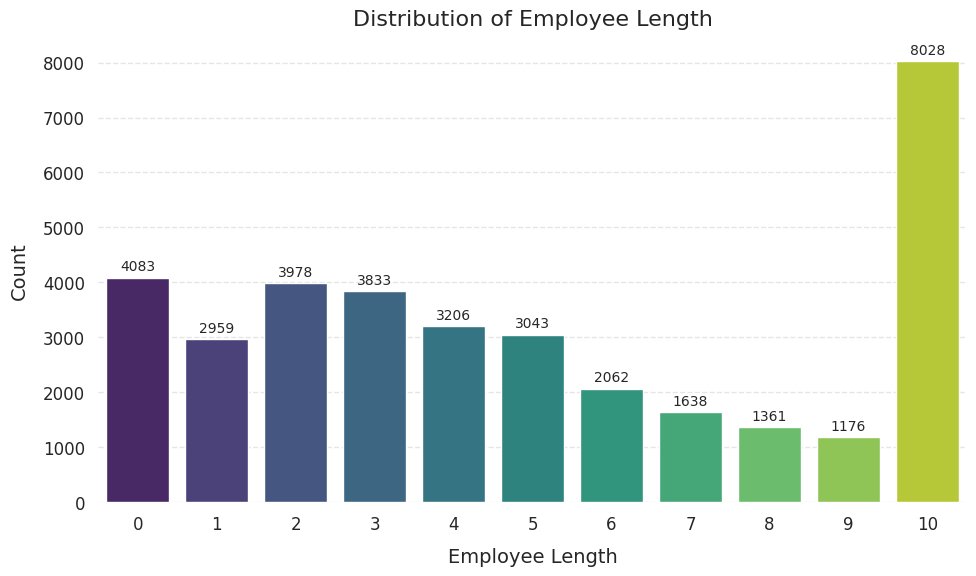

In [ ]:
plot_categorical_distribution(loan_df, 'emp_length', 'Employee Length', rotations=0, sort_index=True)

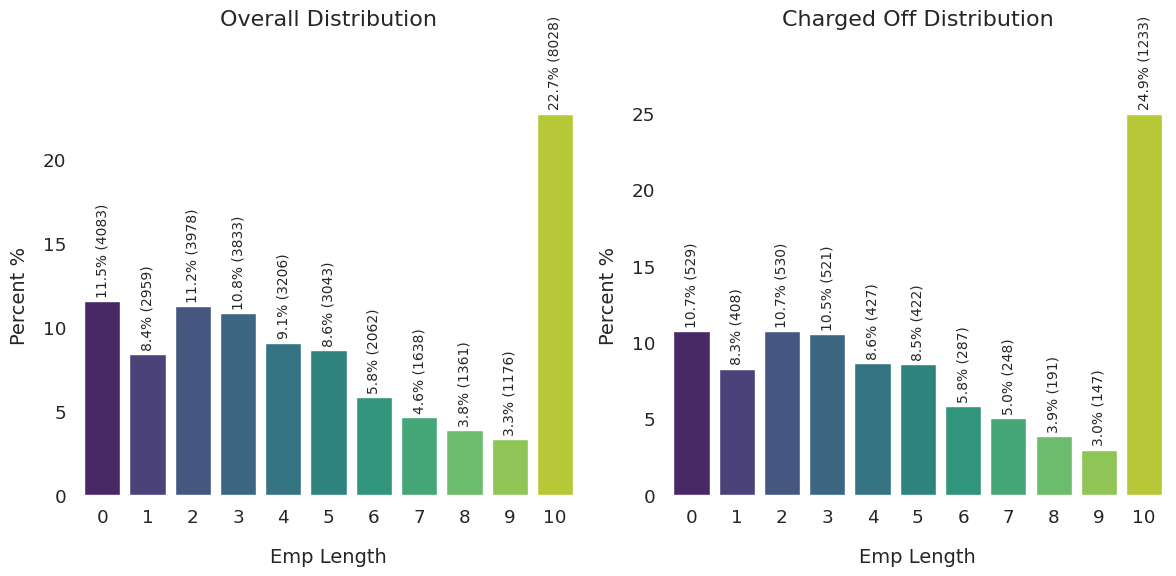

In [ ]:
plot_percentages_by_category(loan_df, 'emp_length', 'Emp Length',  'x', 90, 50, True)

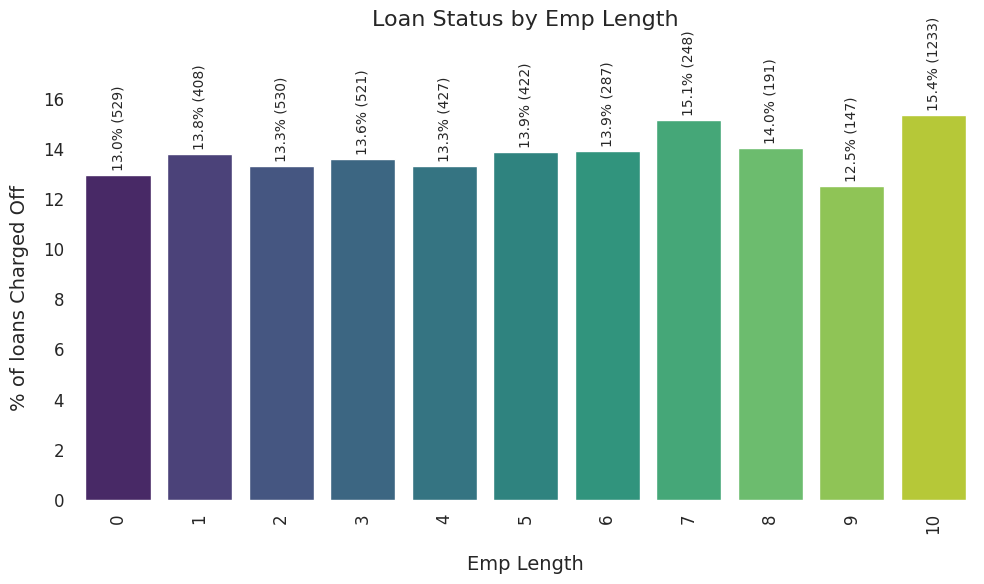

In [ ]:
plot_percent_against_loan_status(loan_df, 'emp_length', 'Emp Length', 90, 50)

**Observations:**
* Loans are distributed across various employment lengths, with 10+ years and less than 1 year having higher frequencies
* Employee length doesn't show a strong trend in charged-off percentage, indicating it might not be a primary indicator of loan default on its own

##### home_ownership

**Definition** <br>
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER

In [ ]:
perform_univariate_analysis(loan_df, 'home_ownership')


Univariate Analysis of 'home_ownership'

Description grouped by loan_status:
             count unique   top   freq
loan_status                           
Charged Off   4943      4  RENT   2517
Fully Paid   30424      4  RENT  14548

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: home_ownership, dtype: int64

Overall value counts:
home_ownership
RENT        17065
MORTGAGE    15703
OWN          2505
OTHER          94
Name: count, dtype: int64


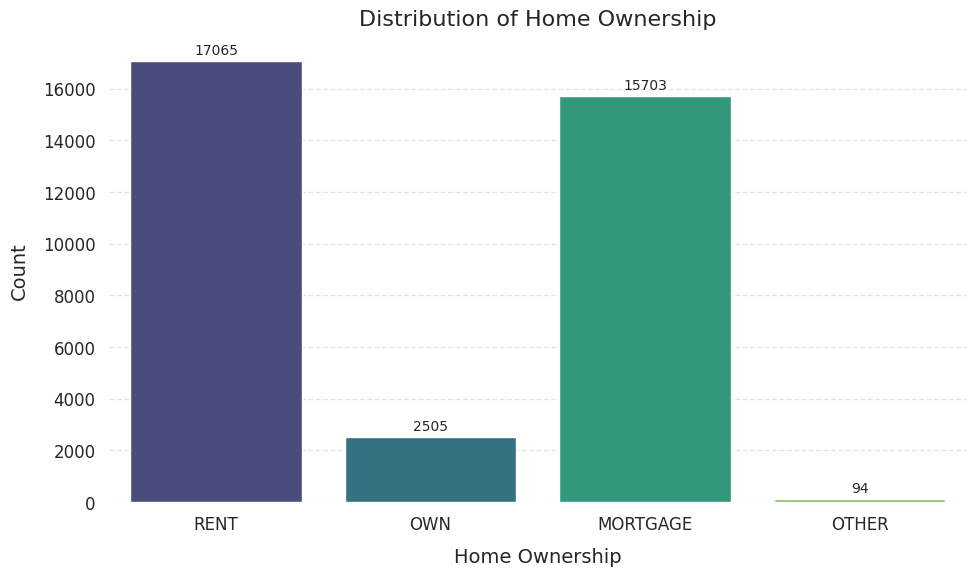

In [ ]:
plot_categorical_distribution(loan_df, 'home_ownership', 'Home Ownership')

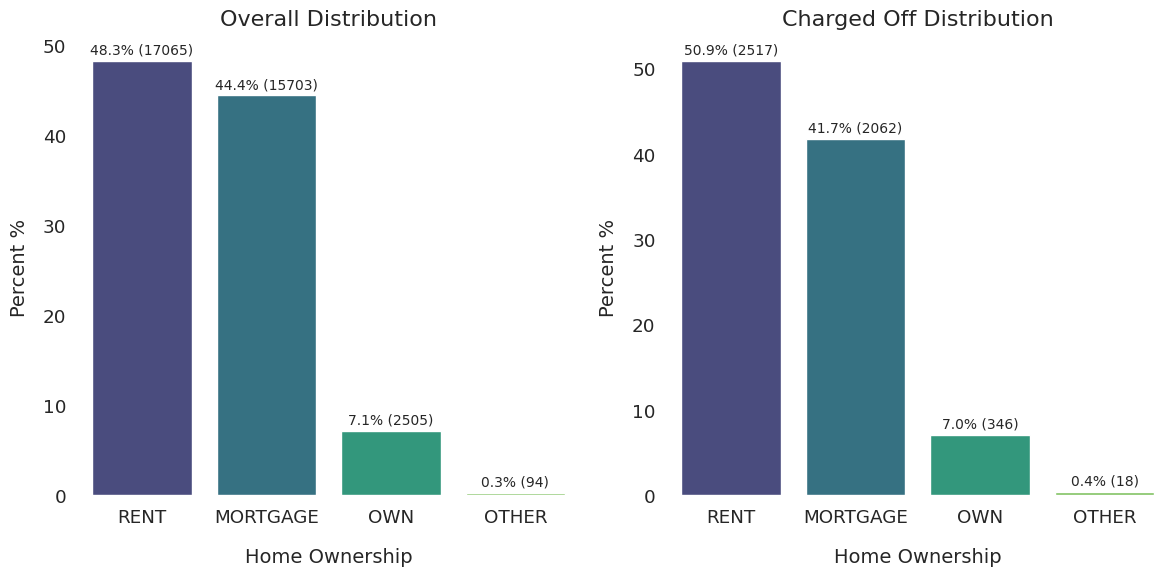

In [ ]:
plot_percentages_by_category(loan_df, 'home_ownership', 'Home Ownership', 'x')

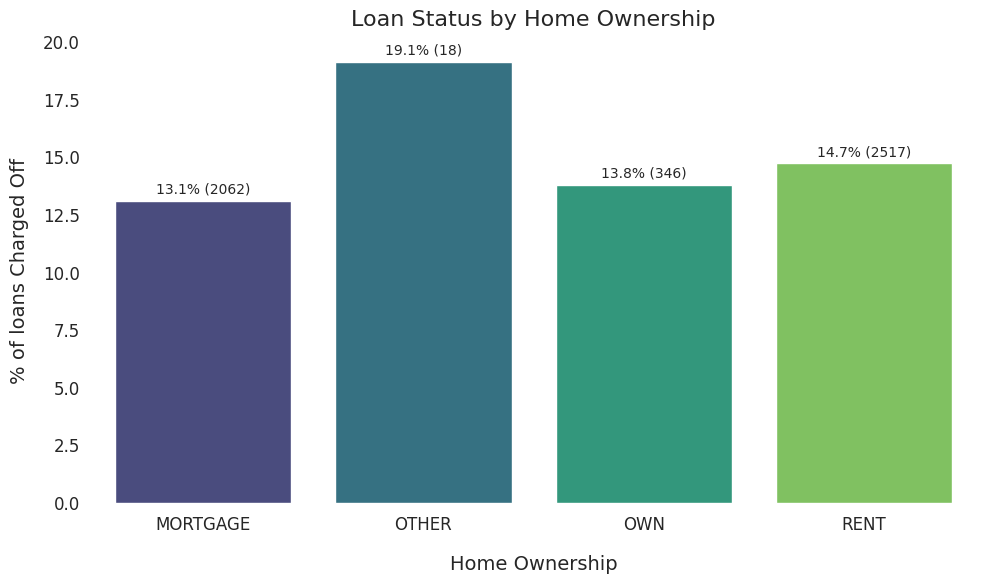

In [ ]:
plot_percent_against_loan_status(loan_df, 'home_ownership', 'Home Ownership')

**Observations:**

*   Most borrowers are either renting or have mortgages, with fewer borrowers categorized as owners or "Other"
* Rent and Mortgage have a high charged off % contributing to approx 92% of all charged off loans in the charged off distribution
* While 'Other' home ownership has the highest charged-off percentage (19.1%), the small sample size of 18 limits its significance in overall analysis.<br>
All categories fall below the key risk threshold (16.78%).



##### verification_status

**Definition**<br>
Indicates if income was verified by LC, not verified, or if the income source was verified

In [ ]:
perform_univariate_analysis(loan_df, 'verification_status')


Univariate Analysis of 'verification_status'

Description grouped by loan_status:
             count unique           top   freq
loan_status                                   
Charged Off   4943      3      Verified   1851
Fully Paid   30424      3  Not Verified  13070

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: verification_status, dtype: int64

Overall value counts:
verification_status
Not Verified       14840
Verified           11363
Source Verified     9164
Name: count, dtype: int64


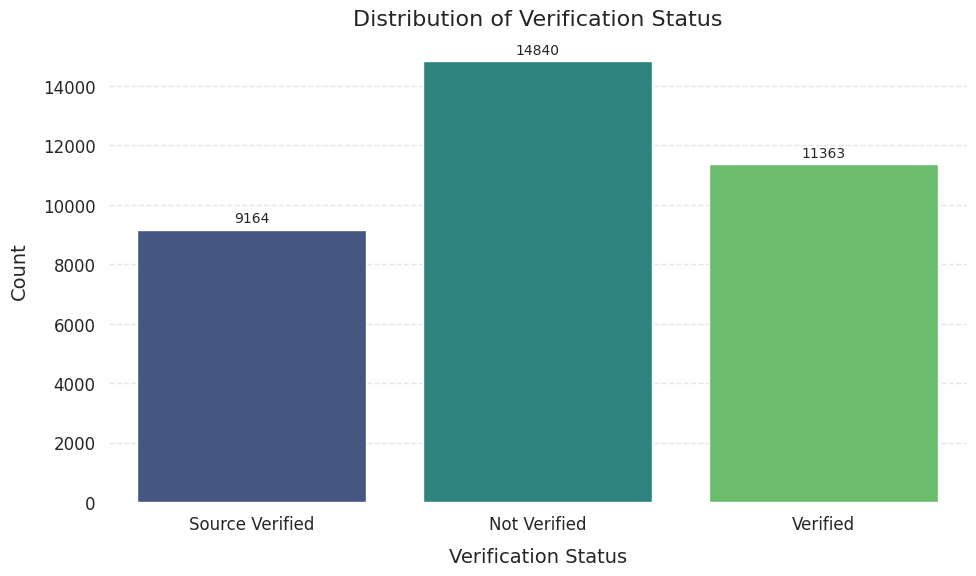

In [ ]:
plot_categorical_distribution(loan_df, 'verification_status', 'Verification Status', rotations=0)

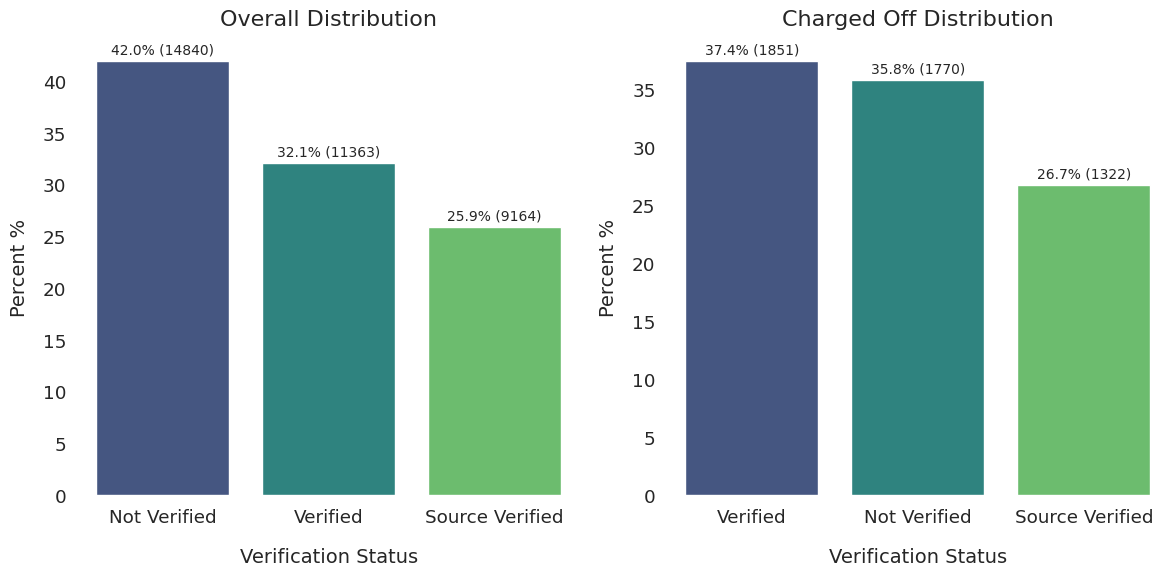

In [ ]:
plot_percentages_by_category(loan_df, 'verification_status', 'Verification Status','x')

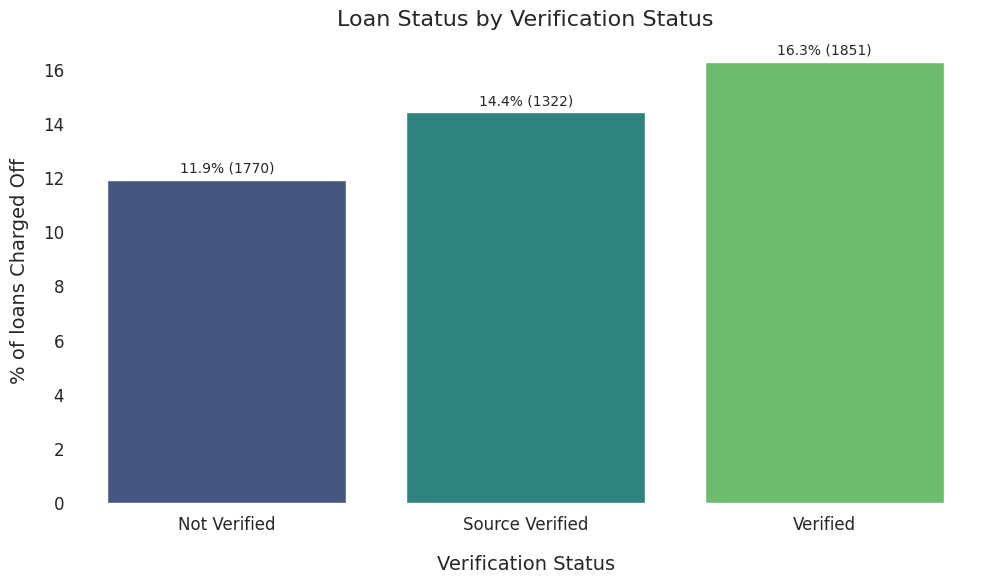

In [ ]:
plot_percent_against_loan_status(loan_df, 'verification_status', 'Verification Status')

**Observations:**
* A substantial number of borrowers are not verified
* Interestingly, loans with "Verified" income sources show the highest charge-off percentage (16.3%), exceeding both "Not Verified" and "Source Verified" categories
* All categories fall below the key risk threshold (16.78%)

##### purpose

**Definition** <br>
A category provided by the borrower for the loan request

In [ ]:
perform_univariate_analysis(loan_df, 'purpose')


Univariate Analysis of 'purpose'

Description grouped by loan_status:
             count unique                 top   freq
loan_status                                         
Charged Off   4943     14  debt_consolidation   2509
Fully Paid   30424     14  debt_consolidation  14402

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: purpose, dtype: int64

Overall value counts:
purpose
debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: count, dtype: int64


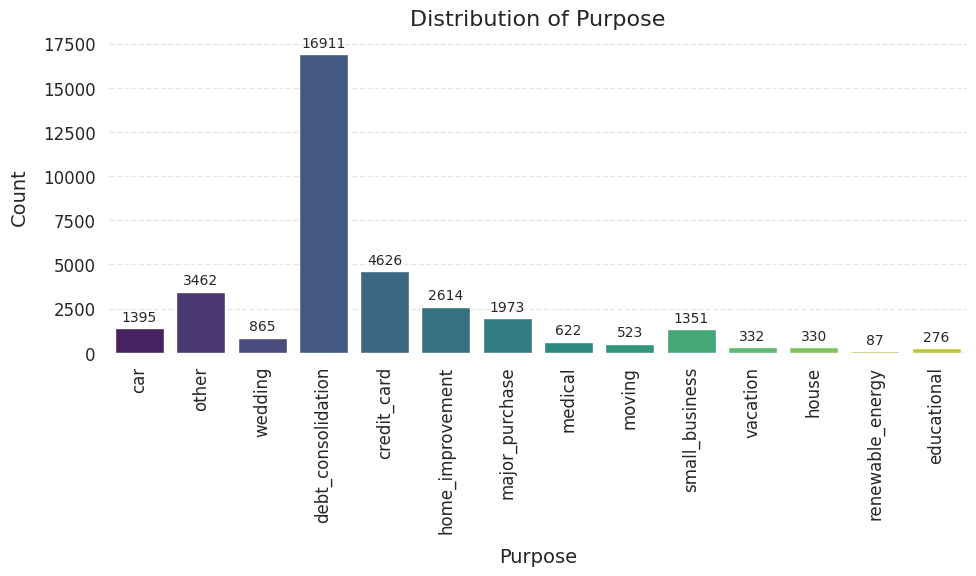

In [ ]:
# material_palette_15 = [
#     "#2196F3",  # Blue
#     "#E91E63",  # Pink
#     "#4CAF50",  # Green
#     "#FFC107",  # Amber
#     "#673AB7",  # Deep Purple
#     "#00BCD4",  # Cyan
#     "#FF5722",  # Deep Orange
#     "#795548",  # Brown
#     "#9C27B0",  # Purple
#     "#3F51B5",  # Indigo
#     "#009688",  # Teal
#     "#FF9800",  # Orange
#     "#607D8B",  # Blue Grey
#     "#CDDC39",  # Lime
#     "#FFEB3B"   # Yellow
# ]

# pastel_palette_15 = [
#     "#BBDEFB",  # Pastel Blue
#     "#F8BBD0",  # Pastel Pink
#     "#C8E6C9",  # Pastel Green
#     "#FFF9C4",  # Pastel Amber
#     "#E1BEE7",  # Pastel Purple
#     "#B2EBF2",  # Pastel Cyan
#     "#FFCCBC",  # Pastel Orange
#     "#D7CCC8",  # Pastel Brown
#     "#E040FB",  # Pastel Magenta (bright accent)
#     "#C5CAE9",  # Pastel Indigo
#     "#B2DFDB",  # Pastel Teal
#     "#FFE0B2",  # Pastel Orange (lighter)
#     "#CFD8DC",  # Pastel Blue Grey
#     "#F0F4C3",  # Pastel Lime
#     "#FFFDE7"   # Pastel Yellow
# ]
plot_categorical_distribution(loan_df, 'purpose', 'Purpose', rotations=90)

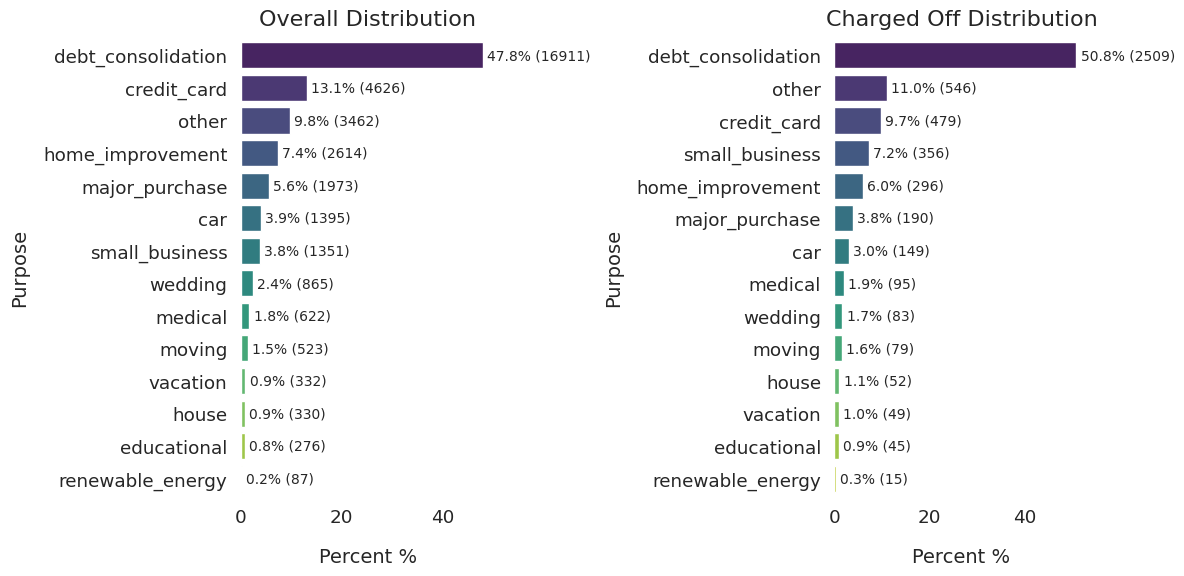

In [ ]:
plot_percentages_by_category(loan_df, 'purpose', 'Purpose', 'y')

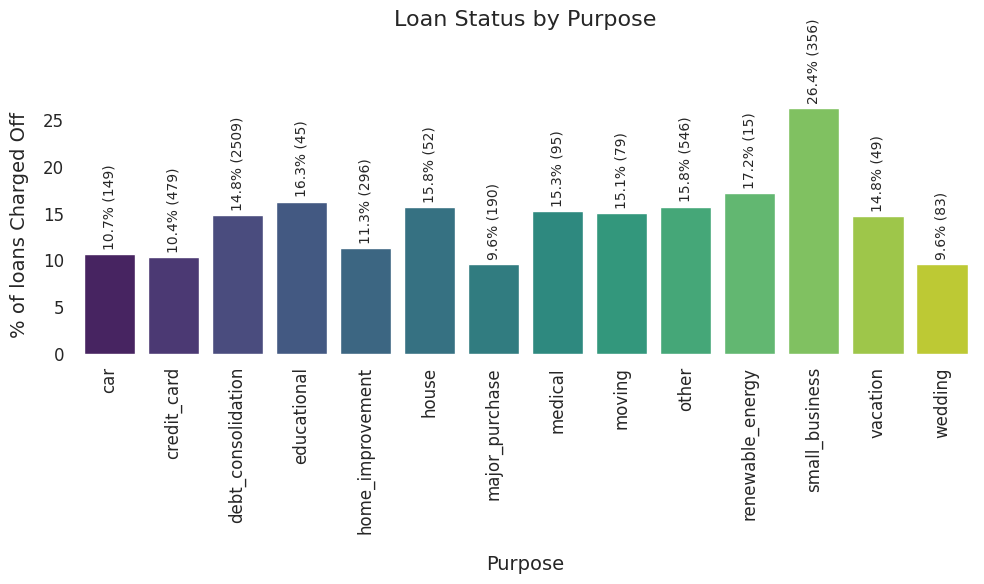

In [ ]:
plot_percent_against_loan_status(loan_df, 'purpose', 'Purpose', 90, 50)

**Observations:**
* Debt consolidation is the primary driver of both loan origination and charge-offs, representing nearly half of all loans. This highlights its significance in the lending landscape and potential risk concentration.
* "Other" loan purposes show a disproportionately higher charge-off rate, indicating a potentially higher risk category requiring further investigation. This suggests that loans for less common purposes might warrant closer scrutiny.
* Small business loans experience a significant jump in charge-off representation (an 89.5% increase), raising concerns about the heightened default risk associated with this sector. This flags small business loans as a potentially vulnerable area deserving of attention.

##### inq_last_6mths

**Definition** <br>
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [ ]:
perform_univariate_analysis(loan_df, 'inq_last_6mths')


Univariate Analysis of 'inq_last_6mths'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   4943.0  1.046126  1.137055  0.0  0.0  1.0  2.0  8.0
Fully Paid   30424.0  0.837891  1.049297  0.0  0.0  1.0  1.0  8.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: inq_last_6mths, dtype: int64

Overall value counts:
inq_last_6mths
0    17183
1     9774
2     5208
3     2703
4      280
5      123
6       54
7       31
8       11
Name: count, dtype: int64


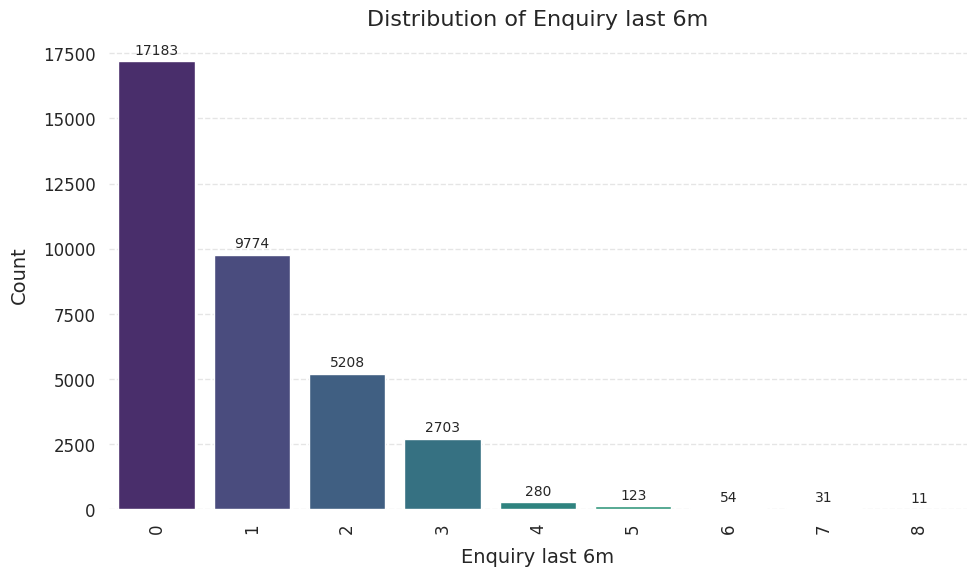

In [ ]:
plot_categorical_distribution(loan_df, 'inq_last_6mths', 'Enquiry last 6m', rotations=90)

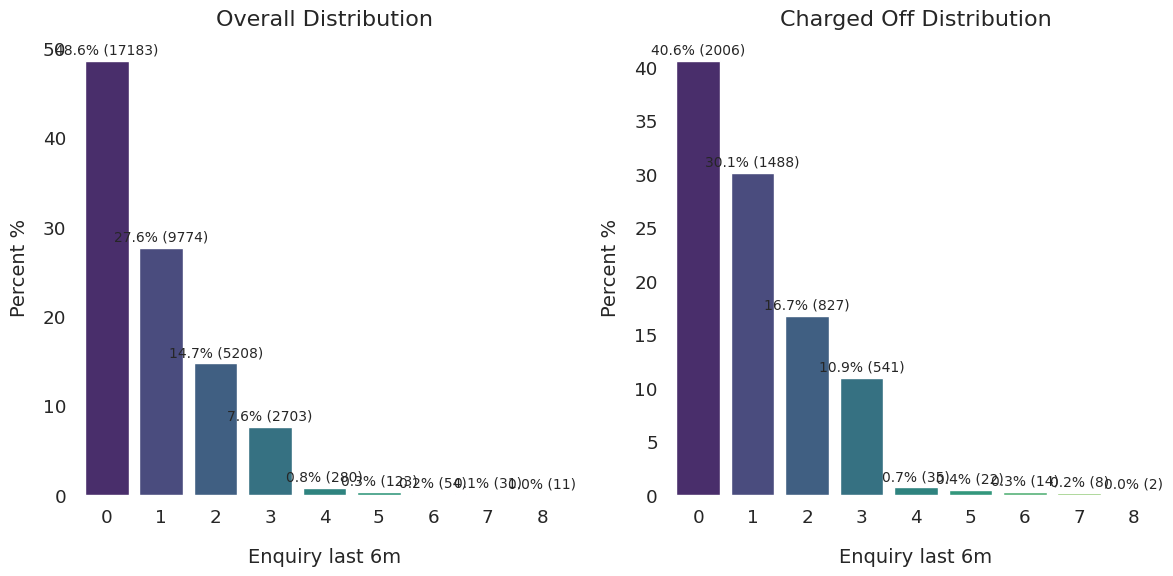

In [ ]:
plot_percentages_by_category(loan_df, 'inq_last_6mths', 'Enquiry last 6m', 'x')

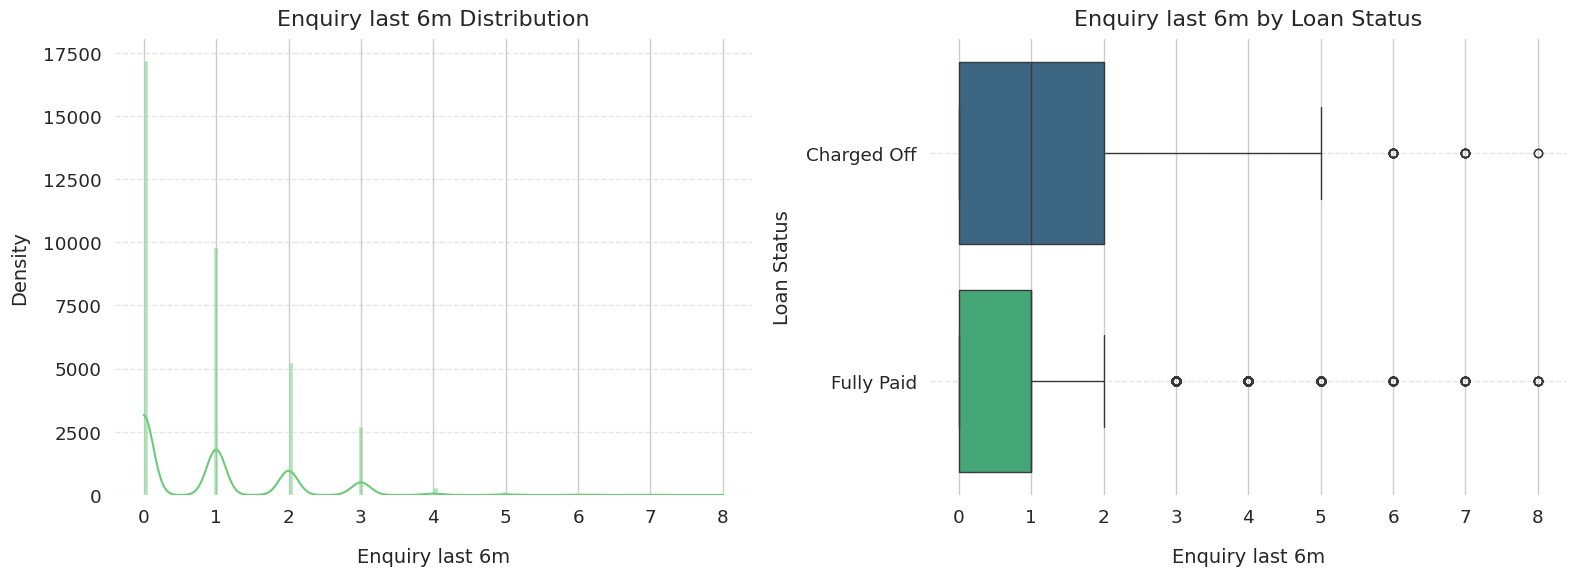

In [ ]:
plot_distribution(loan_df, 'inq_last_6mths', 'Enquiry last 6m')

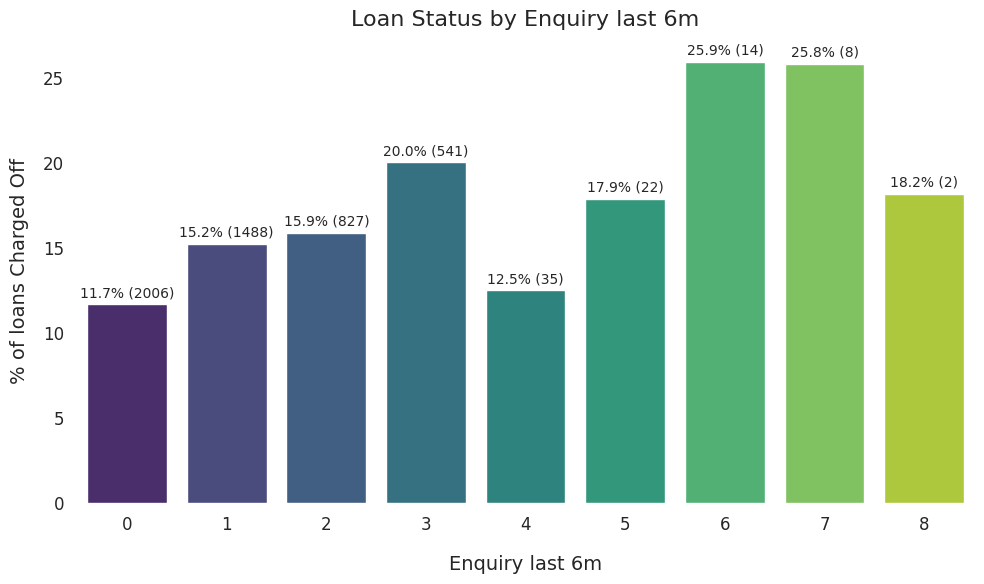

In [ ]:
plot_percent_against_loan_status(loan_df, 'inq_last_6mths', 'Enquiry last 6m')

**Observations:**
* Most borrowers have 0 or 1 enquiries in the last 6 months.
* The charged-off percentage increases with the number of inquiries, suggesting that frequent credit inquiries might be a sign of financial distress.
* Borrowers with 3 or more inquiries in the past 6 months have a considerably higher default risk

##### pub_rec

**Definition**<br>
Number of derogatory public records

In [ ]:
perform_univariate_analysis(loan_df, 'pub_rec')


Univariate Analysis of 'pub_rec'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   4943.0  0.082541  0.282472  0.0  0.0  0.0  0.0  2.0
Fully Paid   30424.0  0.049533  0.226905  0.0  0.0  0.0  0.0  4.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: pub_rec, dtype: int64

Overall value counts:
pub_rec
0    33516
1     1798
2       44
3        7
4        2
Name: count, dtype: int64


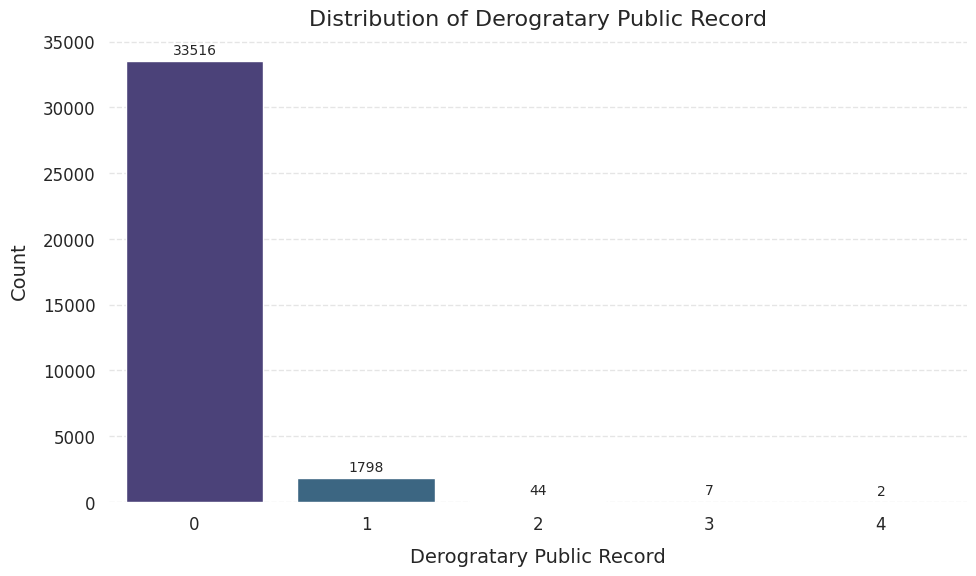

In [ ]:
plot_categorical_distribution(loan_df, 'pub_rec', 'Derogratary Public Record')

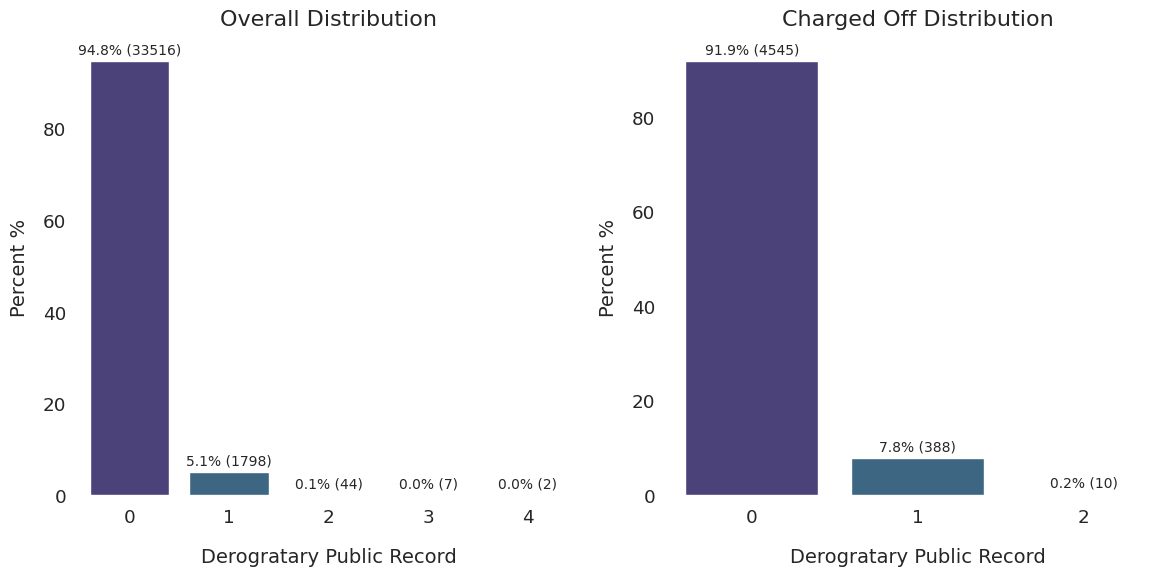

In [ ]:
plot_percentages_by_category(loan_df, 'pub_rec', 'Derogratary Public Record', 'x')

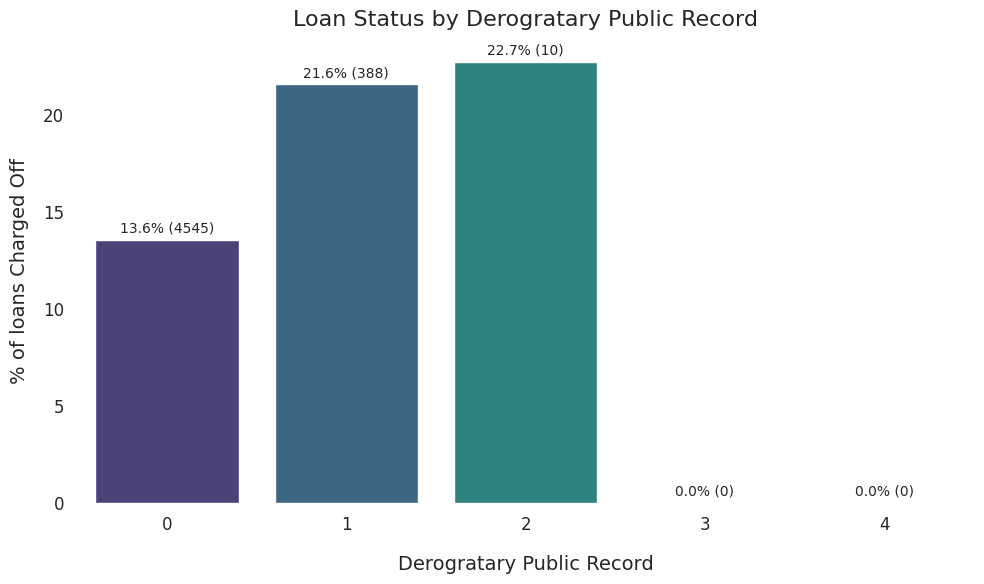

In [ ]:
plot_percent_against_loan_status(loan_df, 'pub_rec', 'Derogratary Public Record')

**Observations:**
* There are significantly low loans offered to people with a derogratory public record
* For those who do get a loan with pub_rec of 1 or above have a 22% risk of default which is above our key risk threshold (16.78%)

##### pub_rec_bankruptcies

**Definition**<br>
Number of public record bankruptcies

In [ ]:
perform_univariate_analysis(loan_df, 'pub_rec_bankruptcies')


Univariate Analysis of 'pub_rec_bankruptcies'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   4943.0  0.063726  0.245941  0.0  0.0  0.0  0.0  2.0
Fully Paid   30424.0  0.038095  0.191943  0.0  0.0  0.0  0.0  2.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: pub_rec_bankruptcies, dtype: int64

Overall value counts:
pub_rec_bankruptcies
0    33898
1     1464
2        5
Name: count, dtype: int64


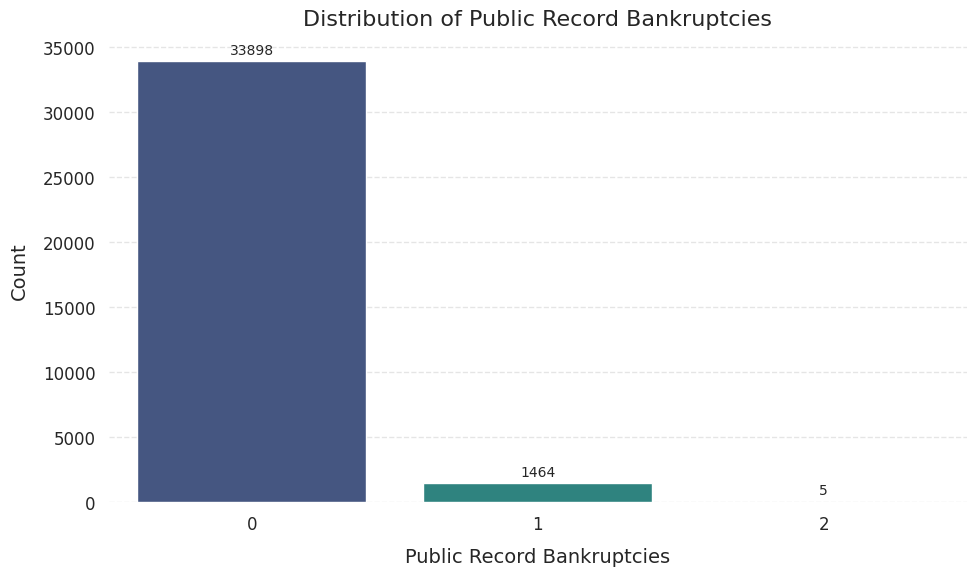

In [ ]:
plot_categorical_distribution(loan_df, 'pub_rec_bankruptcies', 'Public Record Bankruptcies')

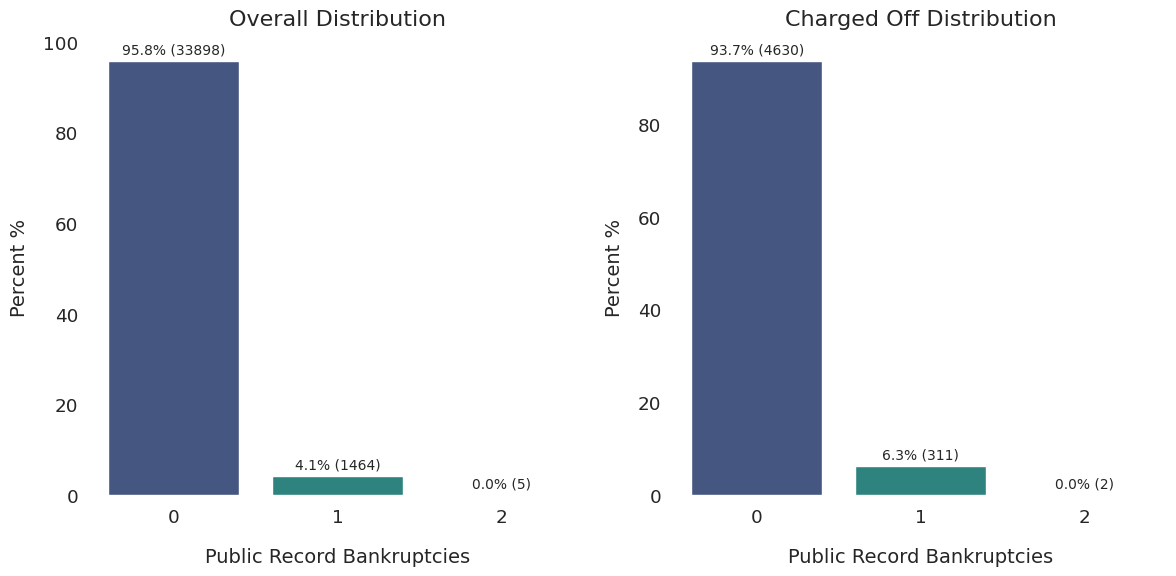

In [ ]:
plot_percentages_by_category(loan_df, 'pub_rec_bankruptcies', 'Public Record Bankruptcies', 'x')

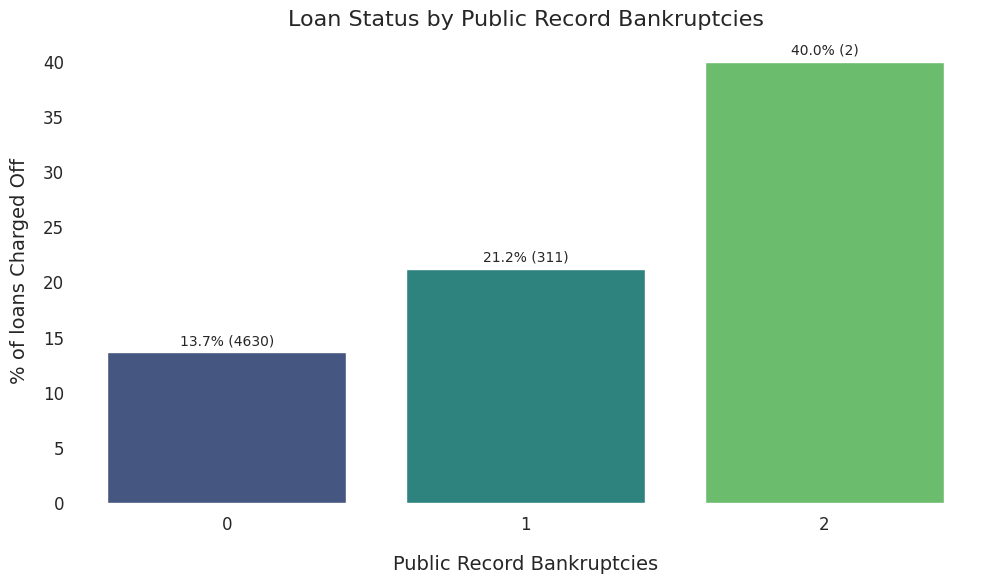

In [ ]:
plot_percent_against_loan_status(loan_df, 'pub_rec_bankruptcies', 'Public Record Bankruptcies')

**Observations:**

*   Most borrowers have 0 public record bankruptcies.
* Borrowers with 1 or more bankruptcies have a significantly higher charged-off percentage, making it a key risk factor.
* Public record bankruptcies strongly indicate a higher likelihood of loan default as more than 21% have defaulted who have a declared bankruptcy of more than 1 which is above our key indicator threshold (16.78%)



#### Numerical Features

##### loan_amnt

**Definition**<br>
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [ ]:
perform_univariate_analysis(loan_df, 'loan_amnt')


Univariate Analysis of 'loan_amnt'

Description grouped by loan_status:
               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4943.0  12286.147077  8064.255961  1000.0  6000.0  10000.0   
Fully Paid   30424.0  10945.731166  7181.867451   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0  

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: loan_amnt, dtype: int64

Overall value counts:
loan_amnt
10000    2587
12000    2118
5000     1821
6000     1748
15000    1701
         ... 
12975       1
15325       1
1125        1
17100       1
12275       1
Name: count, Length: 847, dtype: int64


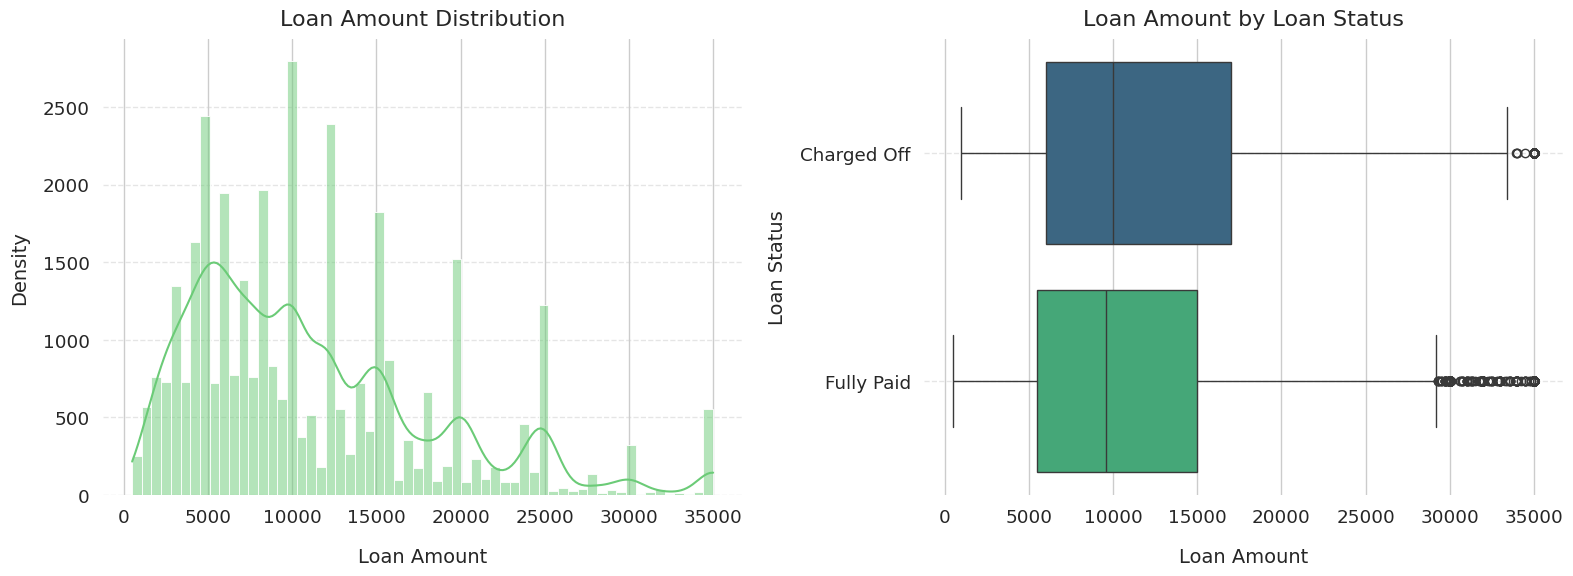

In [ ]:
plot_distribution(loan_df, 'loan_amnt', 'Loan Amount')

Observations from the Distribution Plot: <br>

*   Most loans are clustered between \$5000 and \$15000
*   The distribution skews slightly to the right, indicating the presence of higher loan amounts, but they are less frequent
* There are noticeable peaks at certain amounts, suggesting these amounts might be common loan thresholds or limits offered by the lender
* Loans above \$20,000 are less frequent

Observations from the Box Plot: <br>

*   Overall median of Fully Paid loans tends to be slightly lower than those of Charged off
*   IQR for Charged Off loans is wider that Fully Paid loans indicating greater variance.
* The wider IQR and outliers for "Charged Off" loans do suggest that higher loan amounts are riskier, but this observation should be validated with further statistical analysis or correlation tests.





##### int_rate

**Definition**<br>
Interest Rate on the loan

In [ ]:
perform_univariate_analysis(loan_df, 'int_rate')


Univariate Analysis of 'int_rate'

Description grouped by loan_status:
               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45  24.40
Fully Paid   30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09  24.11

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: int_rate, dtype: int64

Overall value counts:
int_rate
10.99    862
11.49    735
7.51     731
13.49    709
7.88     674
        ... 
24.40      1
17.03      1
10.28      1
12.49      1
11.22      1
Name: count, Length: 334, dtype: int64


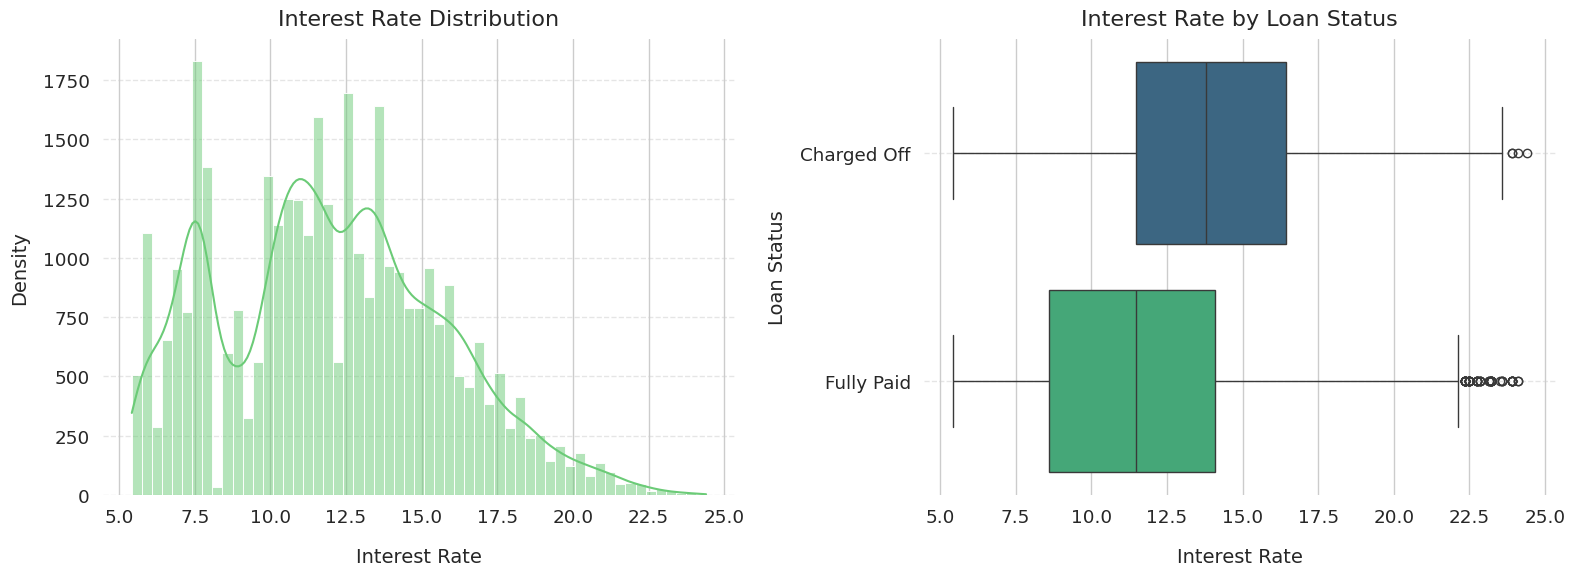

In [ ]:
plot_distribution(loan_df, 'int_rate', 'Interest Rate')

**Observation:**
* The interest rate on loans ranges from 5.42% to 24.4%, with an average of 11.8%.
* Charged-off loans tend to have higher interest rates compared to fully paid loans. This is expected, as lenders typically charge higher rates to compensate for the increased risk associated with borrowers who are more likely to default. Further analysis is needed to explore this relationship in more detail.

In [ ]:
loan_df['interest_rate_buckets'] = round(loan_df['int_rate'])

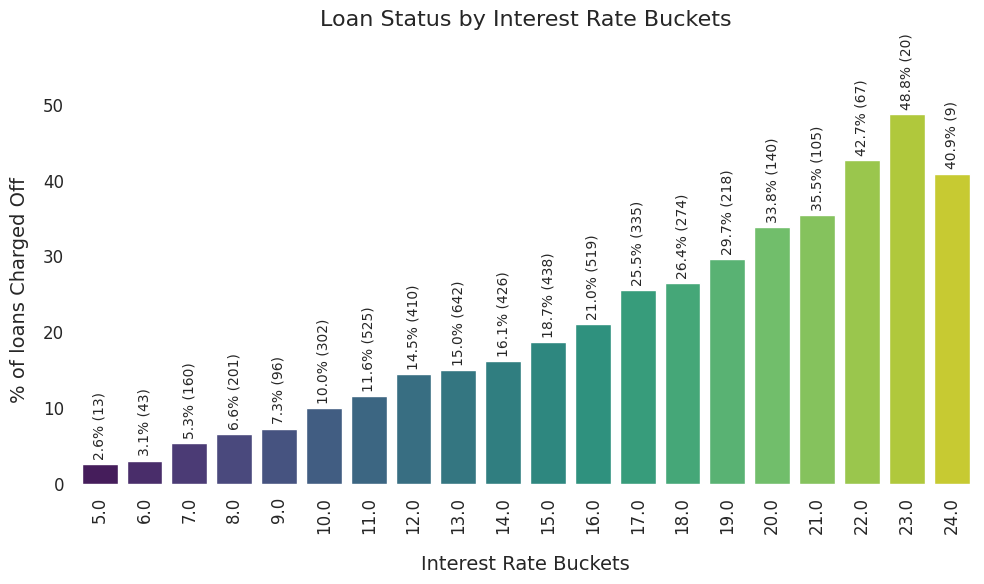

In [ ]:
plot_percent_against_loan_status(loan_df, 'interest_rate_buckets', 'Interest Rate Buckets', 90, 50)


##### installment

In [ ]:
perform_univariate_analysis(loan_df, 'installment')


Univariate Analysis of 'installment'

Description grouped by loan_status:
               count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4943.0  338.848452  214.527655  22.79  172.4350  298.33   
Fully Paid   30424.0  321.638693  205.828423  16.08  167.2975  278.24   

                  75%      max  
loan_status                     
Charged Off  458.3150  1305.19  
Fully Paid   422.3075  1295.21  

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: installment, dtype: int64

Overall value counts:
installment
311.11    65
311.02    53
180.96    52
368.45    43
150.80    43
          ..
231.21     1
404.65     1
232.68     1
183.64     1
122.78     1
Name: count, Length: 14028, dtype: int64


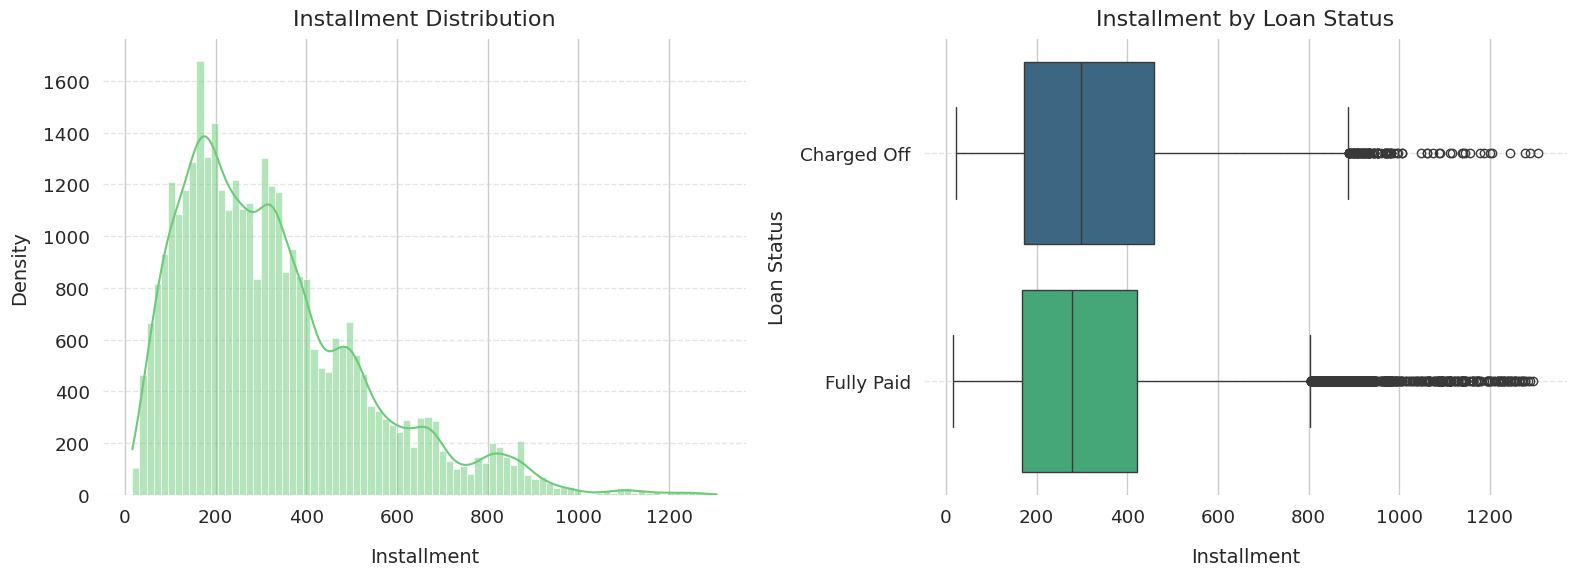

In [ ]:
plot_distribution(loan_df, 'installment', 'Installment')

In [ ]:
loan_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


**Observation:**
-  installment amount varies largely between 170.08 to 420 with median of 280
-  loans Charged Off have high installment on average


##### emp_title
Data_Dictionary: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [ ]:
top10_emp_title = loan_df.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

,count
emp_title,
US Army,128
Bank of America,106
IBM,65
AT&T,57
Kaiser Permanente,55
Wells Fargo,52
USAF,51
UPS,51
US Air Force,50


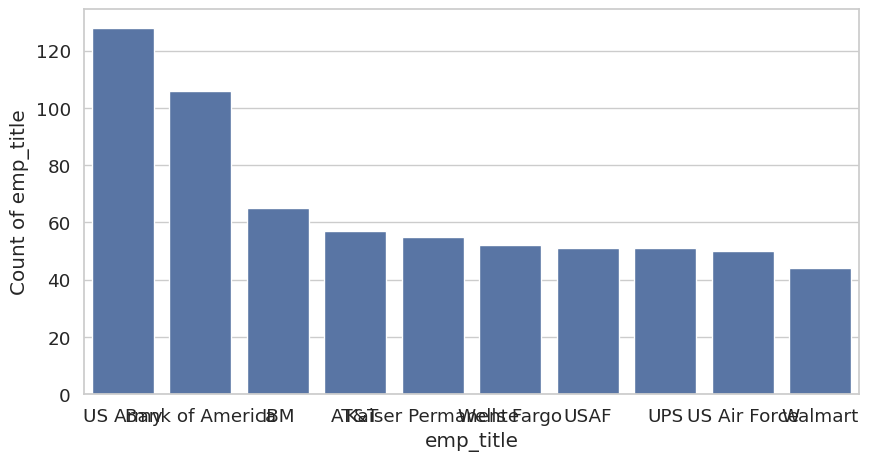

In [ ]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation:**
-  Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
- Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
- <mark>The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates.

In [ ]:
plotLoanStatus(loan_df[loan_df['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

NameError: name 'plotLoanStatus' is not defined

##### annual_inc
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [ ]:
loan_df.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan_df['annual_inc'], data=loan_df)

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000. <mark>There are clearly people with distinctly large income who applying for relatively small loans (up to a maximum of 35,000).</mark>
<br> Median annual income is around 60,000
<br> Most people have an annual income less than 115000

In [ ]:
# Let's get rid of outliers to analyze annual income.
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = loan_df[np.abs(loan_df.annual_inc-loan_df.annual_inc.mean()) <= (3*loan_df.annual_inc.std())]

In [ ]:
df.annual_inc.describe()

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

**Observation:**
-  10000 seems to be a good bin size to further analyze income as categories

In [ ]:
#Create Derived categorical variable
loan_df['income_bin'] = loan_df['annual_inc']/20000
#loan_df['income_bin'] = pd.cut(loan_df['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
loan_df['income_bin'] = loan_df['income_bin'].astype(int)


In [ ]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(loan_df.loc[loan_df['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

**Observation:**
- <mark>Loan defaults are higher for lower income, and progressively reduce as incomes go up.</mark>
- It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

##### issue_d
Data_Dictionary: The month which the loan was funded

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan_df['issue_d_year'], order=sorted(loan_df.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(loan_df['issue_d_month'], order=sorted(loan_df.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(loan_df, 'issue_d_year')

plt.show()


**Observation:**
-  Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
-  Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year?
-  Year of loan has no significant effect on likelihood of default.

In [ ]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loan_df, 'issue_d_month')

**Observation:**
-  Month of loan is spread out and has no significant effect on likelihood of default.


##### title
Data_Dictionary: The loan title provided by the borrower

In [ ]:
loan_df.title.describe()

In [ ]:
loan_df.title.value_counts().head(10)

**Observation:**
- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.

In [ ]:
loan_df = loan_df.drop('title',axis =1 )


##### addr_state
Data_Dictionary: The state provided by the borrower in the loan application

In [ ]:
loan_df.addr_state.value_counts(normalize=True).head(10)

In [ ]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan_df['addr_state'], order=sorted(loan_df.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
Fully_paid_count = loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
#b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
#b.set_ylabel('portion of Loans Fully Paid')
plt.show()


**Observation:**
- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.



##### dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [ ]:
loan_df.dti.describe()

The dti index varies from min 0 to max of 30. The median dti is of 13.5

In [ ]:
plot_distribution(loan_df, 'dti', 'Debt to Income')

In [ ]:
# Create derived variable
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


In [ ]:
plot_percent_against_loan_status(loan_df, 'dti_bin', 'Debt to Income Bin')

**Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off


##### delinq_2yrs
Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [ ]:
loan_df.delinq_2yrs.value_counts(normalize=True)

In [ ]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan_df, 'delinq_2yrs')

**Observation:**
-  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1.



##### earliest_cr_line
Data_Dictionary: The month the borrower's earliest reported credit line was opened.

In [ ]:
loan_df.earliest_cr_line_year.value_counts(normalize=True).head()

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
#sns.countplot(loan_df['earliest_cr_line_year'], order=sorted(loan_df.issue_d_year.unique()))
sns.distplot(loan_df['earliest_cr_line_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(loan_df['earliest_cr_line_month'], order=sorted(loan_df.issue_d_month.unique()))
#plt.show()

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(loan_df.loc[loan_df['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()


**Observation:**
-  8% of the loan applicants have 2000 as the year of earliest credit line.
- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis.
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis.


##### inq_last_6mths
Data_Dictionary: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [ ]:
loan_df.inq_last_6mths.value_counts(normalize=True)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(loan_df['inq_last_6mths'], order=sorted(loan_df.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(loan_df, 'inq_last_6mths')
plt.show()

**Observation:**
-  48.5% of the borrowers do not make any inquiry
-  Those with more than 2 inquiries default at higher rates.
- This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.


##### open_acc
Data_Dictionary: The number of open credit lines in the borrower's credit file.

In [ ]:
loan_df.open_acc.describe()

The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.

In [ ]:
plot_distribution(loan_df, 'open_acc', 'Open Credit Lines')

In [ ]:
loan_df.groupby('loan_status')['open_acc'].describe()

**Observation:**
-  The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.


##### revol_bal
Data_Dictionary: Total credit revolving balance

In [ ]:
loan_df.revol_bal.describe()

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of ~9000.

In [ ]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan_df = loan_df[np.abs(loan_df.revol_bal-loan_df.revol_bal.mean()) <= (3*loan_df.revol_bal.std())]

The values vary a lot. Transforming to a log scale will help analyse better.

In [ ]:
loan_df['revol_bal_log'] = loan_df['revol_bal'].apply(lambda x : np.log(x+1))

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(loan_df['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan_df['revol_bal'], y=loan_df['loan_status'], data=loan_df)
#sns.barplot(x='loan_status', y='annual_inc_log',data= loan_df)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=loan_df['revol_bal'], data=loan_df)
plt.show()

In [ ]:
loan_df.groupby('loan_status')['revol_bal'].describe()

**Observation:**
-  There is no large difference in revolving balance mean for charged off an fully Paid loans


##### revol_util
Data_Dictionary:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [ ]:
loan_df.revol_util.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
loan_df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

**Observation:**
-  The average utilization rate is around 49%
-  <mark>Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans</mark>. This requires more analysis.

In [ ]:
loan_df['revol_util_bin'] = round(loan_df['revol_util']/5)

In [ ]:
plot_percent_against_loan_status(loan_df, 'revol_util_bin', 'Revolving Util Bin')


##### total_acc
Data_Dictionary: The total number of credit lines currently in the borrower's credit file.

In [ ]:
loan_df.total_acc.describe()

In [ ]:
plot_distribution(loan_df, 'total_acc', 'Total Credit Linep')

**Observation:**
-  The are approx. 22 average credit lines for the borrower's.
-  There is no big difference between the Charged Off and Fully Paid credit lines

##### total_pymnt
Data_Dictionary: Payments received to date for total amount funded.

In [ ]:
loan_df.total_pymnt.describe()

In [ ]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan_df = loan_df[np.abs(loan_df.total_pymnt-loan_df.total_pymnt.mean()) <= (3*loan_df.total_pymnt.std())]

In [ ]:
loan_df['total_pymnt'] = loan_df['total_pymnt'].apply(lambda x : np.log(x))

In [ ]:
plot_distribution(loan_df, 'total_pymnt', 'Total Payment')

**Observation:**
-  The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
-  This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [ ]:
loan_df = loan_df.drop('total_pymnt',axis=1)


##### total_pymnt_inv
Data_Dictionary: Payments received to date for portion of total amount funded by investors.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We can drop this variable from analysis.

In [ ]:
loan_df = loan_df.drop('total_pymnt_inv',axis=1)


##### total_rec_prncp
Data_Dictionary: Principal received to date

**Observation:**
-  This variable may not be available at the time of loan funding. we can remove this variable from analysis.

In [ ]:
loan_df = loan_df.drop('total_rec_prncp',axis=1)


##### total_rec_int
Data_Dictionary: Interest received to date.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We may drop this variable from analysis.

In [ ]:
loan_df = loan_df.drop('total_rec_int',axis=1)


##### total_rec_late_fee
Data_Dictionary: Late fees received to date.

**Observation:**
-  The distribution of late fee is very insignificant to this analysis. we can drop this variable.
-  This variable may not be avaialble at the time of loan funding.

In [ ]:
loan_df = loan_df.drop('total_rec_late_fee',axis=1)


##### recoveries
Data_Dictionary: post charge off gross recovery.

**Observation:**
-  Recoveries is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [ ]:
loan_df = loan_df.drop('recoveries',axis=1)


##### collection_recovery_fee
Data_Dictionary: post charge off collection fee.

**Observation:**
-  collection_recovery_fee is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [ ]:
loan_df = loan_df.drop('collection_recovery_fee',axis=1)


##### last_pymnt_d
Data_Dictionary: Last month payment was received.

In [ ]:
loan_df.last_pymnt_d.value_counts().head()

In [ ]:
loan_df['last_pymnt_d_month']= loan_df['last_pymnt_d'].dt.month
loan_df['last_pymnt_d_year']= loan_df['last_pymnt_d'].dt.year

In [ ]:
plot_percent_against_loan_status(loan_df, 'last_pymnt_d_year', 'Last Payment Year')


**Observation:**
-  Overall, around 75% of the last payment dates are during 2012-2014 period.
-  40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis.
- This variable does not affect analysis and will be ignored.


##### last_pymnt_amnt
Data_Dictionary: Last total payment amount received.

In [ ]:
loan_df.last_pymnt_amnt.describe()

The value vary a lot. Lets conver it to log scale and plot to find trend.

In [ ]:
loan_df['last_pymnt_amnt_log'] = loan_df['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

In [ ]:
plot_distribution(loan_df, 'last_pymnt_amnt_log', 'Last Payment Amount')

**Observation:**
-  The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans


##### last_credit_pull_d
Data_Dictionary: The most recent month LC pulled credit for this loan.

In [ ]:
loan_df.last_credit_pull_d.value_counts().head()

In [ ]:
loan_df['last_credit_pull_d_month']= loan_df['last_credit_pull_d'].dt.month
loan_df['last_credit_pull_d_year']= loan_df['last_credit_pull_d'].dt.year

In [ ]:
loan_df.last_credit_pull_d_year.value_counts(normalize=True)

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(loan_df['last_credit_pull_d_year'])
plt.show()


**Observation:**
-  Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously
- This variable can be ignored in our analysis.


Derived variable - ratio of loan amount to annual income

In [ ]:
loan_df['loan_to_income_ratio'] = loan_df['loan_amnt'] * 10 / loan_df['annual_inc']
sns.distplot(loan_df['loan_to_income_ratio'])

In [ ]:
loan_df['ratio_bin'] = (loan_df['loan_to_income_ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plot_percent_against_loan_status(loan_df, 'ratio_bin', 'Loan to Income Ratio')

**Observation:**
-  As long as loan amount is less than 20% of annual income, defaults are low.
- <mark>Loan amounts of 30% of annual income or higher see a high rate of default.</mark>

#### Derived Features

##### loan_amount_bin

In [ ]:
loan_df['loan_amnt_bin'] = pd.cut(
    loan_df['loan_amnt'],
    bins=range(0, 36000, 5000),
    labels=[f'{x}-{5+x}k' for x in range(0, 35, 5)],
    include_lowest=True)
plot_percent_against_loan_status(loan_df, 'loan_amnt_bin', 'Loan Amount Bin')

Observations: <br>

*   As loan amount increase the percentage of loan being charged off also increases
*   People who take loans between \$20,000 to \$35,000 are more likely to be charged-off as there is a higher chance of loan_default
* Loans for small_business already had 26.4% charged off rate will do bivariate analysis to gather more insights

##### interest_rate_buckets

##### issue_d_year

##### issue_d_month

### Bivariate Analysis

In [ ]:
def bivariate_analysis(df, x_col, y_col, plot_type='scatter',xticksRotation=0, **kwargs):
    """
    Performs bivariate analysis on a DataFrame with enhanced plot styling.

    Args:
        df: pandas DataFrame.
        x_col: Name of the column for the x-axis.
        y_col: Name of the column for the y-axis.
        plot_type: Type of plot to create ('scatter', 'line', 'bar', 'box', 'count').
                   Defaults to 'scatter'.

    Returns:
        None (displays the plot).
    """
    sns.set_theme(style="whitegrid", font_scale=1.2)  # Set theme for consistent styling

    # Dynamically calculate figure width based on unique categories (for bar and count plots)
    if plot_type in ['bar', 'count']:
        n_categories = df[x_col].nunique()
        fig_width = max(10, n_categories * 0.5)
        plt.figure(figsize=(fig_width, 6))
    else:
        plt.figure(figsize=(10, 6))  # Default figure size for other plot types

    if plot_type == 'scatter':
        ax = sns.scatterplot(x=x_col, y=y_col, data=df, **kwargs)
    elif plot_type == 'line':
        ax = sns.lineplot(x=x_col, y=y_col, data=df, **kwargs)
    elif plot_type == 'bar':
        ax = sns.barplot(x=x_col, y=y_col, data=df, **kwargs)
    elif plot_type == 'box':
        ax = sns.boxplot(x=x_col, y=y_col, data=df, width=0.45, **kwargs)
    elif plot_type == 'count':
        ax = sns.countplot(x=x_col, hue=y_col, data=df, **kwargs)
    else:
        print("Invalid plot type. Choose from 'scatter', 'line', 'bar', 'box', 'count'.")
        return

    # Apply consistent plot styling
    sns.despine(left=True, bottom=True)  # Remove spines
    ax.grid(False)  # Remove grid lines

    title_font_size = 16  # Set title font size
    plt.xlabel(x_col, fontsize=title_font_size - 2, labelpad=10)  # Set x-axis label
    plt.ylabel(y_col, fontsize=title_font_size - 2, labelpad=10)  # Set y-axis label
    plt.title(f'{plot_type.capitalize()} Plot of {x_col} vs. {y_col}',
              fontsize=title_font_size, pad=10)  # Set title

    plt.xticks(rotation=xticksRotation if xticksRotation else 0, fontsize=title_font_size - 4)  # Set x-tick labels
    plt.yticks(fontsize=title_font_size - 4)  # Set y-tick labels

    plt.tight_layout()
    plt.show()

###### Home ownership

In [ ]:
bivariate_analysis(loan_df, 'home_ownership', 'loan_status', 'count', 0)

**Observations:**


* Defaulters are more among the customers who are on RENT or MORTGAGE
* The percentage of defaulters are less than 16% compared to the Fully Paid ones, so we can conclude that this is not deciding factor in identifying the default risk factors




###### Loan Purpose

In [ ]:
bivariate_analysis(loan_df, 'purpose', 'loan_status', 'count', 90)

**Observations:**


*   Debt consolidation is the main reason for the loan borrowal and the defaulting trend also is higher for the loans taken on this purpose
*   Lending club should be more cautious in lending the loans for debt consolidation


In [ ]:
loan_df.info()

###### Annual Income

In [ ]:
plot_distribution(loan_df, 'annual_inc', 'Annual Income')

**Observations:**
* Borrowers with "Fully Paid" loans have a slightly lower median annual income compared to those with "Charged Off" loans
* The income distribution for "Charged Off" loans appears slightly wider
* There are more high-income outliers in the "Charged Off" category than in the "Fully Paid" category. This suggests that even high-income borrowers can default, although this may be rare.

This tells us that income alone does not seem to be a definitive predictor of loan default, as borrowers with higher incomes also show defaults.


Lets try to combine the annual_income with dti for the curstomer and then do the analysis since it gives the financial status of the customer

In [ ]:
bivariate_analysis(loan_df, 'dti', 'loan_status', 'box')

In [ ]:
# Map loan_status to numeric for correlation analysis
loan_df['loan_status_numeric'] = loan_df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Select relevant columns for correlation analysis
correlation_columns = ['annual_inc', 'dti', 'loan_status_numeric']

# Compute correlation matrix
correlation_matrix = loan_df[correlation_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

Checking the financial stability of the customers taking loan for debt consolidation

In [ ]:
debt_consolidation_df = loan_df[loan_df['purpose'] == 'debt_consolidation']
debt_consolidation_df.groupby('loan_status')[['annual_inc', 'dti']].agg(['mean', 'median'])

**Observations:**
* As we can see above, there is a negative correlation between annual_income, dti and the default trend. The higher the income the dti is lower and the chances of loan repayment are more.
* Lending club can consider the financial stability of the customer by checking their income and dti before approving the loan

* Also, we can see that customers who default the loans taken for debt consolidation have lower income and higher dti. These three factors should be considered
while approving the loan

##### Loan status vs Loan attributes

###### Loan amount and interest rate

In [ ]:
# Checking the defaulting trends based on the loan amount and the interest rate
bivariate_analysis(loan_df, 'loan_amnt', 'int_rate', 'scatter',hue='loan_status')

**Observations:**
* We can see that the full paid and the charged off loans are spread across the loan_amnt range. The number of loans are lesser on the higher amount range
* As the interest gets higher, the chances of being charged off is high

To avoid loss for the lending club, the interest rates should be decided based on the other factors like dti. For higher dti where the default chances are high, it would be good to charge higher interest rates to recover the cost

###### Defaulting based on the loan grade

As part of the Univariate analysis earlier, we have seen that the charged-off percentage is higher when the grade is low (A being highest and G being lowest). Lets find the relation between grade and other variables

In [ ]:
bivariate_analysis(loan_df, 'grade', 'int_rate', 'box')

As we can see above, the interest rate seems to be higher for the lower grade. This aligns with the fact that when interest rate goes up default chances are high.

So the loans with higher grade has lower interest rate and less chances of being defaulted.

In [ ]:
bivariate_analysis(loan_df, 'inq_last_6mths', 'loan_status', 'box')

There is a clear relationship between loans being charged off and the inquiries on the customer

Bi variate analysis findings:

1. The annual income of the customer doesnt seem to have a high influence on the loan default rate. However, when this is combined with other factors, there seems to be a trend
2. The default risk is higher for the customers who take the loans for the purpose = 'debt consolidation' and where the annual income is lower and dti is higher
3. As the interest rate goes up, the tendency to default also increases. Since grading is linked to the interest rate, there is a chance of high default rates with lower grades (E-G)
4. The defaulters are more on the customers who are on RENT or MORTGAGE
5. The customers with the history of public bankruptcies have high default rate, so this aspect should have a strict validation before the approval


### Multivariate Analysis

In [ ]:
sns.despine(left=True, bottom=True)
sns.pairplot(data=loan_df[['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'loan_status']],
             hue='loan_status',diag_kind='kde', palette='viridis')
# plt.suptitle('Pairplot of Loan Attributes', y=1.02)
plt.show()

In [ ]:
### Coorelation matrix for all numerical variables